In [ ]:
##16S SEQUENCES ANALYSIS##

In [2]:
library(phyloseq)
library(ggplot2)

In [3]:
#Loading TAXA and OTU tables and phylogenetic tree
taxa= as.matrix(read.table("nochimera_screened_singleton_cpmt.tax", row.names=1, fill=TRUE, header=T))
TAXA = tax_table(taxa)
write.table(tax_table(taxa),"all_otu_tax.tsv")
bact1 = import_biom("nochimera_screened_singleton_cpmt.biom", "mezcal.nwk")
write.table(otu_table(bact1),"all_otu_counts.tsv")
bact1
table1=read.table("otu_wo_zeros.tsv", row.name=1) #OTUs with zero count were removed. These OTUs came from pulque samples that were removed for the mezcal analysis.
OTU = otu_table(table1, taxa_are_rows=T)
TREE = phy_tree(bact1)

#Creating phyloseq object
bact = phyloseq(OTU,TREE,TAXA)
bact

#Ordering table
sample_order <- sample_names(bact)
trimmed_sample_names <- trimws(sample_order)
sample_names(bact) <- trimmed_sample_names
mezcal_data=read.delim("metadata_text", header=TRUE, row.names=1, sep="\t")

common_samples <- intersect(trimmed_sample_names, row.names(mezcal_data))
common_samples

bact_prunned <- prune_samples(common_samples, bact)
bact
bact_prunned

bact <- bact_prunned
bact

#Arranging dataframe so the samples in OTU tbale match with the ones in sampledata
mezcal_data_index <- match(common_samples, row.names(mezcal_data))
mezcal_data <- mezcal_data[mezcal_data_index,]

#Naming variables of emtadata
sampledata=sample_data(data.frame(SL=mezcal_data$SequencingLabel,criolab=mezcal_data$CriovialLabel,criolabw=mezcal_data$Criovial_label_withIsolates,state=mezcal_data$State, reg=mezcal_data$Region, mun=mezcal_data$Municipality, dist=mezcal_data$Distillery_name, distid=mezcal_data$Distillery_ID, agavesp=mezcal_data$Agave_speciesname,subsp=mezcal_data$Agave_suspeciesname, agavenm=mezcal_data$Agave_commoname, ensmb=mezcal_data$Assemble,fdays=mezcal_data$Fermentation_days,ftotal=mezcal_data$Fermentation_totaldays,fp=mezcal_data$Fermentation_percentage,fer=mezcal_data$Fermentation_range,tankm=mezcal_data$Tank_material, alt=mezcal_data$Altitude, lat=mezcal_data$Latitude_site, long=mezcal_data$Longitude_site, tankt=mezcal_data$Tank_temperatureC,cook=mezcal_data$Cooking_type, alemb=mezcal_data$Alembic_material,grind=mezcal_data$Grinding_type,inoc=mezcal_data$Inoculum,date=mezcal_data$Sample_date_YYYYMMDD, newlat=mezcal_data$NewLatitude_Municipality_Geocode,newlong=mezcal_data$NewLongitude_Municipality_Geocode,tinanm=mezcal_data$Num_de_Tina,loc=mezcal_data$Location_ID,GKd=mezcal_data$Climate_GK,GK=mezcal_data$ClimateGroup_GK,Lp=mezcal_data$Loc_PrecipMediaAnual,Li=mezcal_data$Loc_Isotermalidad,Lt=mezcal_data$Loc_TempMediaAnual,La=mezcal_data$Loc_Altitud_inegi,div=mezcal_data$Shannon_index, divs=mezcal_data$Simpson_index,tc=mezcal_data$time_comp, b=mezcal_data$beverage,seqr=mezcal_data$sequencing_round, ns=mezcal_data$num_samples,po=mezcal_data$comp1,pa=mezcal_data$comp2,row.names=sample_names(bact)))

#Creating phyloseq object 
bact <- merge_phyloseq(bact, sampledata)
bact

#Saving ordered tables
table2=tax_table(bact)
write.table(table2,"tax_final.tsv")
table3=otu_table(bact)
dim(table3)
write.table(table3,"otu_final.tsv")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 16840 taxa and 103 samples ]
phy_tree()    Phylogenetic Tree: [ 16840 tips and 16830 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

character(0)

[1] "zr4450.10V4V4" "zr4450.11V4V4" "zr4450.12V4V4" "zr4450.13V4V4"
 [5] "zr4450.14V4V4" "zr4450.15V4V4" "zr4450.16V4V4" "zr4450.17V4V4"
 [9] "zr4450.18V4V4" "zr4450.19V4V4" "zr4450.20V4V4" "zr4450.21V4V4"
[13] "zr4450.22V4V4" "zr4450.23V4V4" "zr4450.24V4V4" "zr4450.25V4V4"
[17] "zr4450.26V4V4" "zr4450.27V4V4" "zr4450.28V4V4" "zr4450.29V4V4"
[21] "zr4450.2V4V4"  "zr4450.30V4V4" "zr4450.31V4V4" "zr4450.32V4V4"
[25] "zr4450.33V4V4" "zr4450.34V4V4" "zr4450.35V4V4" "zr4450.36V4V4"
[29] "zr4450.37V4V4" "zr4450.38V4V4" "zr4450.39V4V4" "zr4450.3V4V4" 
[33] "zr4450.40V4V4" "zr4450.42V4V4" "zr4450.44V4V4" "zr4450.45V4V4"
[37] "zr4450.46V4V4" "zr4450.47V4V4" "zr4450.48V4V4" "zr4450.49V4V4"
[41] "zr4450.4V4V4"  "zr4450.50V4V4" "zr4450.52V4V4" "zr4450.53V4V4"
[45] "zr4450.54V4V4" "zr4450.55V4V4" "zr4450.56V4V4" "zr4450.57V4V4"
[49] "zr4450.59V4V4" "zr4450.5V4V4"  "zr4450.6V4V4"  "zr4450.7V4V4" 
[53] "zr4450.8V4V4"  "zr4450.9V4V4"  "zr6680.10V4V4" "zr6680.11V4V4"
[57] "zr6680.12V4V4" "zr6680.13V4V4" "zr6680.14V4V4" "zr6680.15V4V4"
[61] "zr6680.17V4V4" "zr6680.18V4V4" "zr6680.19V4V4" "zr6680.1V4V4" 
[65] "zr6680.20V4V4" "zr6680.21V4V4" "zr6680.22V4V4" "zr6680.23V4V4"
[69] "zr6680.24V4V4" "zr6680.25V4V4" "zr6680.26V4V4" "zr6680.27V4V4"
[73] "zr6680.2V4V4"  "zr6680.3V4V4"  "zr6680.4V4V4"  "zr6680.5V4V4" 
[77] "zr6680.6V4V4"  "zr6680.7V4V4"  "zr6680.8V4V4"  "zr6680.9V4V4" 
[81] "zr6680.16V4V4" "zr3707.6V3V4"  "zr3707.5V3V4"  "zr3707.1V3V4" 
[85] "zr3707.7V3V4"  "zr3707.10V3V4" "zr3707.2V3V4"  "zr3707.3V3V4" 
[89] "zr3707.4V3V4"  "zr3707.8V3V4"  "zr3707.9V3V4"

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

[1] 10093    91

In [4]:
#Creating tables collapsed at Genus level
table=tax_glom(bact, "Genus")
table
write.table(otu_table(table),"table_glom")
write.table(tax_table(table),"table_glom_tax")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]

In [31]:
##Alpha diversity analysis##

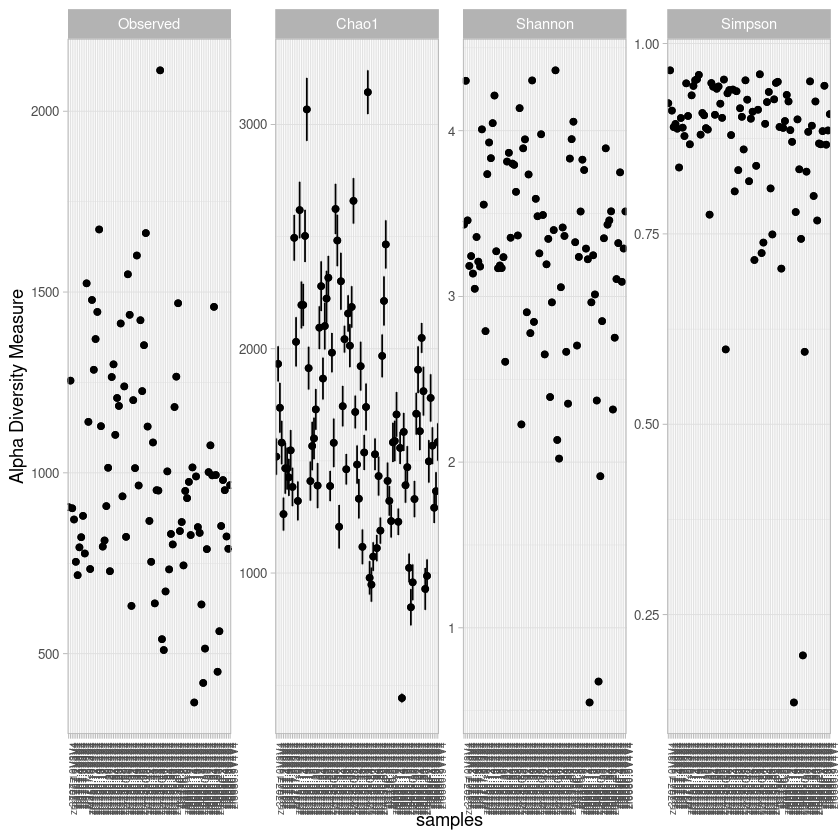

In [3]:
#Obtaining and plotting diversity indices 
write.table(estimate_richness(bact), file="div_mezcal_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
violin_richness=plot_richness(bact,  measures=c("Observed", "Shannon", "Simpson","Chao1"))
violin_richness +theme_light()+geom_point(size=1.5)+ #scale_color_gradient(high="red",low="white")+
        theme(axis.text.y = element_text(size = 8),axis.text.x = element_text(size = 6,angle = 90, hjust = 1))

In [3]:
library(microbiome)


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform




In [18]:
#Calculating Pilou index
even_index=microbiome::evenness(bact)
write.table(even_index,"even_index_bact.tsv")

In [5]:
#Estimating global diversity
rich=estimate_richness(bact, split=FALSE, measures=NULL)
write.table(estimate_richness(bact, split=FALSE), file="div_global_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")

In [33]:
#Evaluating distillery effect

In [5]:
library(vegan)
library(ggsignif)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



In [6]:
#Using Shannon
c= merge_samples(bact,"criolabw")
write.table(estimate_richness(c), file="div_c_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_c_16Sotus.tsv")
cs =read.table("div_c_16Sotus.tsv", header=TRUE, row.names = NULL)
colnames(cs)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

d= merge_samples(bact,"distid")
write.table(estimate_richness(d), file="div_disid_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_disid_16Sotus.tsv")
ds =read.table("div_disid_16Sotus.tsv", header=TRUE, row.names = NULL)
colnames(ds)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

m= merge_samples(bact,"mun")
write.table(estimate_richness(m), file="div_m_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_m_16Sotus.tsv")
ms =read.table("div_m_16Sotus.tsv", header=TRUE, row.names = NULL)
colnames(ms)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

st= merge_samples(bact,"state")
write.table(estimate_richness(st), file="div_st_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_st_16Sotus.tsv")
sts =read.table("div_st_16Sotus.tsv", header=TRUE, row.names = NULL)
colnames(sts)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")

r= merge_samples(bact,"reg")
write.table(estimate_richness(r), file="div_r_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
read.table("div_r_16Sotus.tsv")
rs =read.table("div_r_16Sotus.tsv", header=TRUE, row.names = NULL)
colnames(rs)=c("Sample","Observed","Chao1","SE.Caho1","ACE","SE.ACE","Shannon","Simpson","InvSimpson","Fisher")


#Using unweighted Unifrac distance
c.UF=UniFrac(c, weighted=FALSE, normalized=FALSE, fast=TRUE)
d.UF=UniFrac(d, weighted=FALSE, normalized=FALSE, fast=TRUE)
m.UF=UniFrac(m, weighted=FALSE, normalized=FALSE, fast=TRUE)
st.UF=UniFrac(st, weighted=FALSE, normalized=FALSE, fast=TRUE)
r.UF=UniFrac(r, weighted=FALSE, normalized=FALSE, fast=TRUE)

#Using Bray-Curtis distance

c.bray=phyloseq::distance(c, "bray")
d.bray=phyloseq::distance(d, method="bray")
m.bray=phyloseq::distance(m, method="bray")
st.bray=phyloseq::distance(st, method="bray")
r.bray=phyloseq::distance(r, method="bray")

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G001,1255,1932.5046,78.45195,2048.7872,26.47465,4.301447,0.9648381,28.439913,251.14776
G002,794,1465.7154,93.57086,1589.5029,24.73395,3.046140,0.8372297,6.143627,139.34269
G004,902,1736.8819,111.09073,1821.7396,27.59378,3.458773,0.9119599,11.358456,164.93539
G005,822,1426.6087,82.57215,1563.3831,24.99896,3.358585,0.9022317,10.228263,151.22769
G006,871,1581.5547,96.77232,1626.9064,25.15795,3.184004,0.8903050,9.116184,156.50071
G007,881,1547.0672,90.31775,1612.4195,24.53194,3.210007,0.8895936,9.057443,159.28789
G008,754,1262.8189,73.59313,1391.7095,23.49778,3.243295,0.8944233,9.471787,134.61504
G009,777,1383.8400,85.53343,1501.4182,24.50203,3.180428,0.8785503,8.233860,139.67835
G010,717,1467.0652,113.42167,1513.6968,24.08787,3.137968,0.8882123,8.945525,127.29719


Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D001,3213,3962.1174,60.65849,4303.0534,34.98407,3.755043,0.9365751,15.766668,479.45850
D002,636,1023.2449,63.89848,1028.6215,18.25603,2.371720,0.7434857,3.898418,105.76818
D003,450,929.2222,93.27364,925.3616,19.06364,2.317483,0.7676236,4.303364,71.39213
D004,562,987.3457,73.43992,970.6489,18.22102,2.750950,0.8687741,7.620446,91.39209
D005,853,1497.9159,94.76234,1436.6921,22.09348,3.104641,0.8676850,7.557723,144.80222
D006,1727,2653.8514,100.69623,2547.5001,27.18827,3.770874,0.9325596,14.827903,261.06019
D007,2734,4139.0619,117.02318,4203.0931,36.47073,4.173794,0.9578154,23.705327,415.39066
D008,1966,3095.8103,108.75480,3175.0206,32.63693,3.752204,0.9139152,11.616450,314.98429
D009,2194,3309.6593,100.52113,3464.3169,34.10520,3.858896,0.9423760,17.353873,354.45806


Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bacanora,2053,2950.3642,88.10410,2947.8152,29.46544,3.537320,0.9181101,12.211525,292.51149
Baviacora,952,1537.4967,78.13778,1598.5907,23.53780,2.964050,0.8394668,6.229242,164.10238
El.Tuito,1328,2008.1724,80.45347,2078.8925,25.79500,3.425518,0.9231747,13.016540,206.20880
Las.Guasimas.Cabo.Corrientes,1202,2174.4909,115.55581,2174.1068,27.83497,2.350087,0.6926652,3.253781,175.39195
Los.Lobos,853,1497.9159,94.76234,1436.6921,22.09348,3.104641,0.8676850,7.557723,144.80222
Matope.Villa.Pesqueira,540,978.7619,74.46312,1048.7329,20.43380,2.133649,0.7248478,3.634352,90.24293
Miahuatlan,1370,2195.2174,93.61284,2230.6418,27.58921,3.834096,0.9518581,20.771917,231.33432
Moctezuma,920,1643.9453,98.29423,1602.4529,23.46950,2.698510,0.8357517,6.088345,139.90394
Morelia.Pino.Bonito,636,1023.2449,63.89848,1028.6215,18.25603,2.371720,0.7434857,3.898418,105.76818


Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Durango,1572,2707.075,123.07730,2592.250,29.00256,3.113818,0.8518532,6.750062,249.9193
Guanajuato,2363,3375.115,91.30169,3512.178,32.72782,3.149402,0.8369441,6.132866,360.2115
Jalisco,3102,4855.709,135.24555,4911.361,39.31479,3.524971,0.8921812,9.274824,455.6685
Michoacan,1553,2469.951,99.66768,2469.183,27.99361,3.241537,0.8919651,9.256265,234.2829
Oaxaca,8330,8741.843,32.02209,9158.199,45.65117,4.472447,0.9680673,31.315830,1048.3848
Puebla,2736,3809.195,98.43713,3822.253,32.92553,4.108325,0.9281713,13.922019,452.9377
Sonora,3594,4840.137,95.04445,4952.182,37.17160,3.682123,0.9216300,12.759979,507.2404
Tamaulipas,3056,4257.894,96.62416,4442.361,36.51627,4.058253,0.9437306,17.771634,483.1762


Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Balsas.basin,1553,2469.951,99.66768,2469.183,27.99361,3.241537,0.8919651,9.256265,234.2829
Central.highlands,2363,3375.115,91.30169,3512.178,32.72782,3.149402,0.8369441,6.132866,360.2115
Northeast,3056,4257.894,96.62416,4442.361,36.51627,4.058253,0.9437306,17.771634,483.1762
Northwest,3594,4840.137,95.04445,4952.182,37.17160,3.682123,0.9216300,12.759979,507.2404
South.central,9018,9329.135,26.37388,9717.484,47.39911,4.512252,0.9680164,31.266006,1137.7856
West.I,1572,2707.075,123.07730,2592.250,29.00256,3.113818,0.8518532,6.750062,249.9193
West.II,3102,4855.709,135.24555,4911.361,39.31479,3.524971,0.8921812,9.274824,455.6685


Warning message in UniFrac(c, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 191495 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(d, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 48 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(m, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 12258 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(st, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 189583 -- in the phylogenetic tree in the data you provided.”
Warning message in UniFrac(r, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 10199 -- in the phylogenetic tree in the data you provided.”


Warning message in wilcox.test.default(c(29.0025618518452, 32.72781509936, 39.3147912134028, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(34.9840725657138, 18.2560329513989, 19.0636372133447, :
“cannot compute exact p-value with ties”
Saving 6.67 x 6.67 in image
Warning message in wilcox.test.default(c(29.0025618518452, 32.72781509936, 39.3147912134028, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(34.9840725657138, 18.2560329513989, 19.0636372133447, :
“cannot compute exact p-value with ties”
Saving 6.67 x 6.67 in image
Warning message in wilcox.test.default(c(29.0025618518452, 32.72781509936, 39.3147912134028, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(34.9840725657138, 18.2560329513989, 19.0636372133447, :
“cannot compute exact p-value with ties”


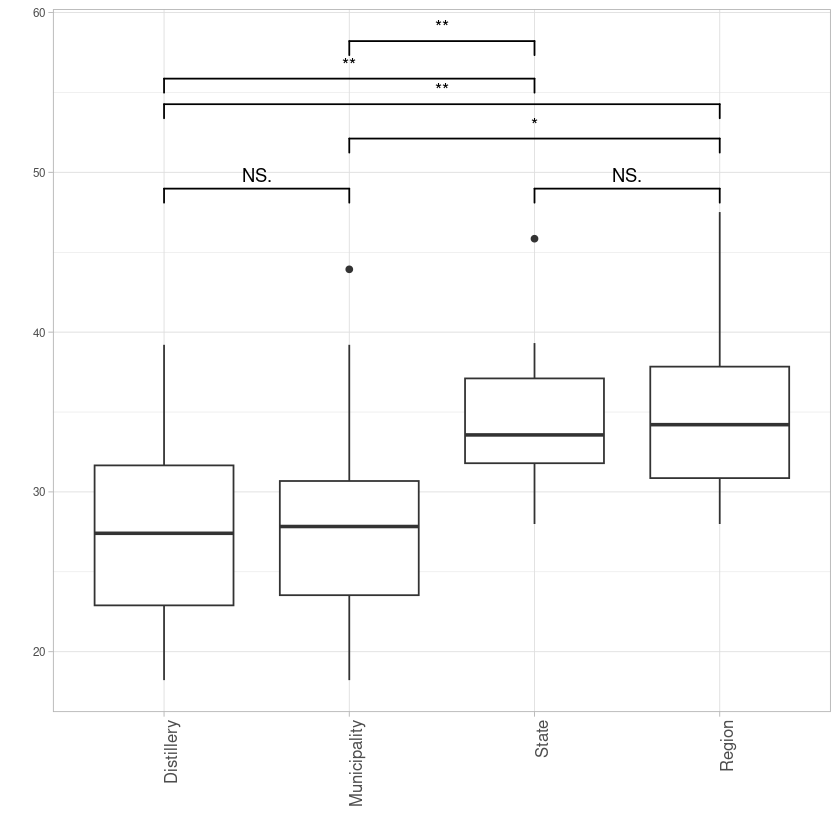

In [14]:
#Creating plot to estimate ditillery effect 
shan_t=read.table("shannon_all_16S.tsv", header=TRUE, row.names = NULL)
colnames(shan_t)=c("Sample","Shannon")

a=ggplot(data=shan_t, aes(x = Sample, y= Shannon))  + 
    geom_boxplot() + theme_light () +
    xlab("") + ylab("") + 
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 7)) +
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(56.75, 56.85),comparisons = list(c("Municipality", "State")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(52.8, 52.9),comparisons = list(c("Distillery", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(54.4, 54.5),comparisons = list(c("Distillery", "State")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, y_position = c(50.65, 50.75),comparisons = list(c("Municipality", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, comparisons = list(c("State", "Region")))+
    geom_signif(test = 'wilcox.test', map_signif_level = TRUE, comparisons = list(c("Distillery", "Municipality")))

neworder=c("Distillery","Municipality","State","Region")
a$data$Sample <- as.character(a$data$Sample)
a$data$Sample <- factor(a$data$Sample, levels=neworder)
a

In [6]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [10]:
#Obtaining relative abundances at Phylum level 
#Tax glom at phylum level
bact
phy_bact=tax_glom(bact,"Phylum")
phy_bact
phy_table_c=otu_table(phy_bact)
phy_table_t=tax_table(phy_bact)
write.table(phy_table_c, "phy_glom_counts.tsv")
write.table(phy_table_t, "phy_glom_tax.tsv")
counts_p=as(otu_table(phy_bact), "matrix")
counts_phy=(as.data.frame(counts_p))                            
rel_phy=transform_sample_counts(phy_bact, function(x) (x/sum(x)))
                                
#Grouping samples according to distillery 
rel_phy_dist=merge_samples(rel_phy,"distid")
rel_phy_dist

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29 taxa and 91 samples ]
sample_data() Sample Data:       [ 91 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 29 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29 tips and 28 internal nodes ]

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 29 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 29 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 29 tips and 28 internal nodes ]

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.defaul

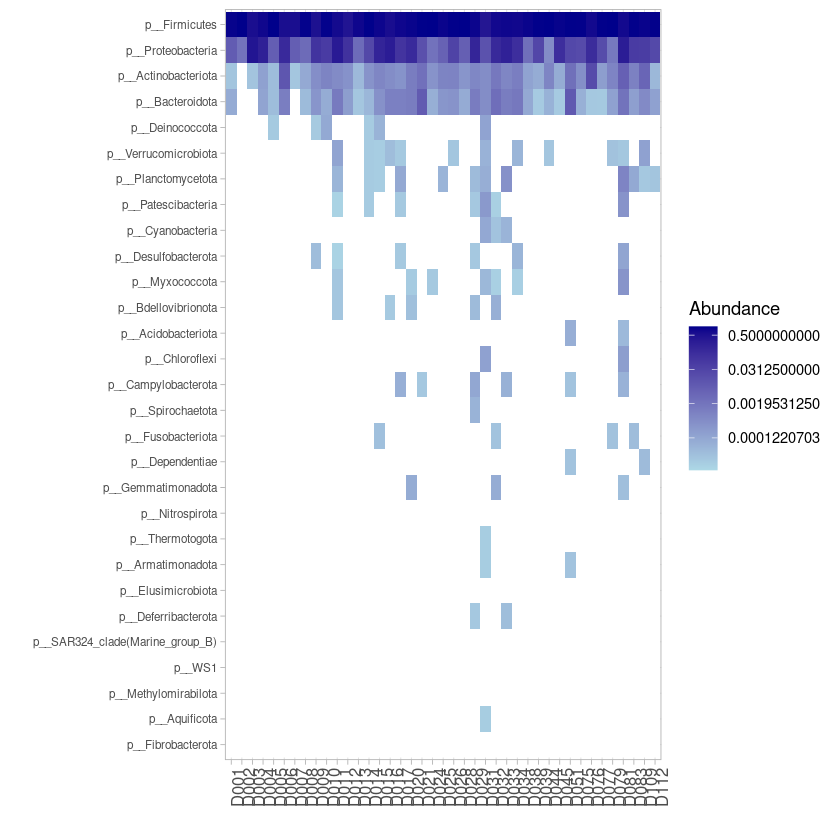

In [8]:
#Plotting Phylum abundance
p <- plot_bar(rel_phy, "Phylum")
#Obatining graph data 
p1 <- p$data
p1 <- as.data.frame(p1)
#Ordering from most abundant to least abundant
p1 <- p1[order(-p1$Abundance),]

#Plotting
p_plot = ggplot(data=p1, aes(x = reorder(distid,distid), y= reorder(Phylum,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () +
    xlab("") + ylab("") + 
    scale_fill_gradient(low="light blue", high="dark blue", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 7)) 
p_plot

In [7]:
#Obtaining relative abundances at Genus level 
#Tax glom at genus level
gen_bact=table #El objeto table es bact con tax_glom a nivel de género
counts_g=as(otu_table(gen_bact), "matrix")
counts_gen=(as.data.frame(counts_g))
write.table(tax_table(table),"tax_gen.tsv")
write.table(counts_gen,"counts_gen.tsv", quote=FALSE, sep='\t')
write.table(gen_bact %>% tax_glom(taxrank = "Genus") %>% 
        #transform_sample_counts(function(x) {x/sum(x)}) %>% 
        psmelt() %>%
        select(Genus, Sample, Abundance), #%>% spread(Sample, Abundance), 
        file = "ps.relative_abundance.genus.tsv", sep = "\t", quote = F, row.names = F, col.names = T)

# #Grouping samples according to distillery                             
rel_gen=merge_samples(gen_bact,"distid") 
rel_gen_dist=transform_sample_counts(rel_gen, function(x) (x/sum(x)))
rel_gen_dist

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]

In [15]:
#Creating tables to check presence/absence 
pd=as.data.frame(otu_table(rel_gen_dist))
pd=pd %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(pd,"pres_dist_gen.tsv")
df=as.data.frame(read.table("counts_gen.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(df,"pres_abs_gen.tsv")

In [16]:
#Counting taxa in object without collapsing for comparison
counts_o=as(otu_table(bact), "matrix")
counts_otu=(as.data.frame(counts_o))
write.table(counts_otu,"counts_otu.tsv", quote=FALSE, sep='\t')
write.table(tax_table(bact),"tax_otu.tsv", quote=FALSE, sep='\t')
df=as.data.frame(read.table("counts_otu.tsv"))
df=df %>% mutate_if(is.numeric, ~1 * (. > 0))
write.table(df,"pres_abs_otu_bact.tsv")
                           
rel_otu=merge_samples(bact,"distid") 
                                
#Grouping samples according to distillery 
rel_otu_dist=transform_sample_counts(rel_otu, function(x) (x/sum(x)))
rel_otu_dist

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

In [17]:
#Comparing object collapsed to Genus and not collapsed
rel_otu    
rel_gen

rel_otu_dist
rel_gen_dist

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 41 samples ]
sample_data() Sample Data:       [ 41 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]

In [19]:
dim(pdo)

[1]    41 10093

Warning message:
“Transformation introduced infinite values in discrete y-axis”


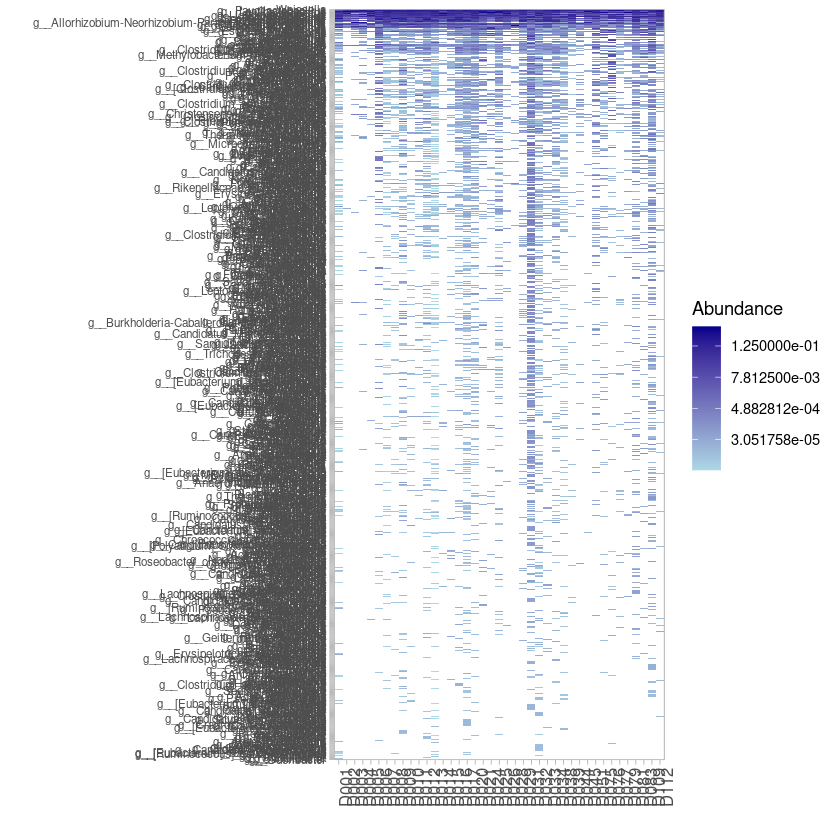

In [12]:
#Plotting species abundance
s <- plot_bar(rel_gen_dist, "Genus")
#Obatining graph data 
s1 <- s$data
s1 <- as.data.frame(s1)
#Ordering from most abundant to least abundant
s1 <- s1[order(-s1$Abundance),]

#Plotting
s_plot = ggplot(data=s1, aes(x = reorder(Sample,distid), y= reorder(Genus,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () +
    xlab("") + ylab("") + 
    scale_fill_gradient(low="light blue", high="dark blue", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=10, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 7)) 
#svg("genus_all.svg")
s_plot
#dev.off()

Warning message:
“Transformation introduced infinite values in discrete y-axis”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


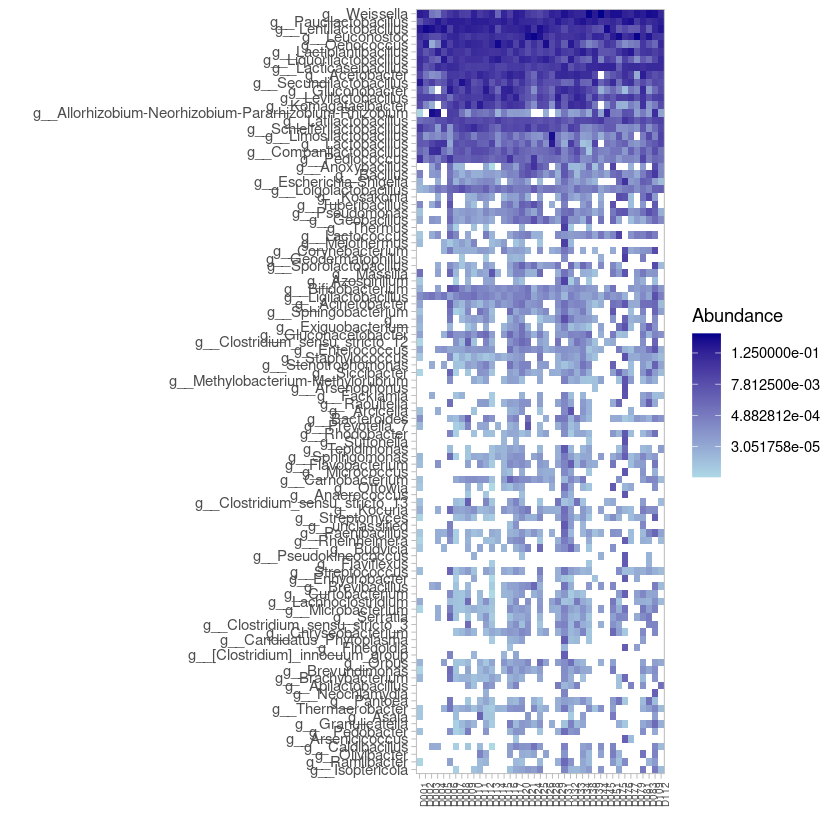

In [21]:
#Obtaining relative abundances at Genus level collapsed by distillery                               
#Plotting only the 100 most abundant genera collapsed by distillery 
top100dg <- prune_taxa(names(sort(taxa_sums(rel_gen_dist),TRUE)[1:100]),rel_gen_dist)
                                 
#Plotting species abundance
dg100 <- plot_bar(top100dg, "Genus")
##Obatining graph data 
dg100 <- dg100$data
dg100 <- as.data.frame(dg100)
#Ordering from most abundant to least abundant
dg100 <- dg100[order(-dg100$Abundance),]
write.table(dg100,"bact_100_dist_abund.tsv")
top100dg_plot = ggplot(data=dg100, aes(x = reorder(Sample,distid), y= reorder(Genus,Abundance), fill= Abundance))  + 
    geom_raster() + theme_light () +
    xlab("") + ylab("") + 
    scale_fill_gradient(low="light blue", high="dark blue", na.value = "white", trans = "log2") +
    theme(axis.text.x = element_text(size=6, angle = 90, hjust = 1),
          axis.text.y = element_text(size = 9)) 
top100dg_plot

In [28]:
##Beta diversity analysis##

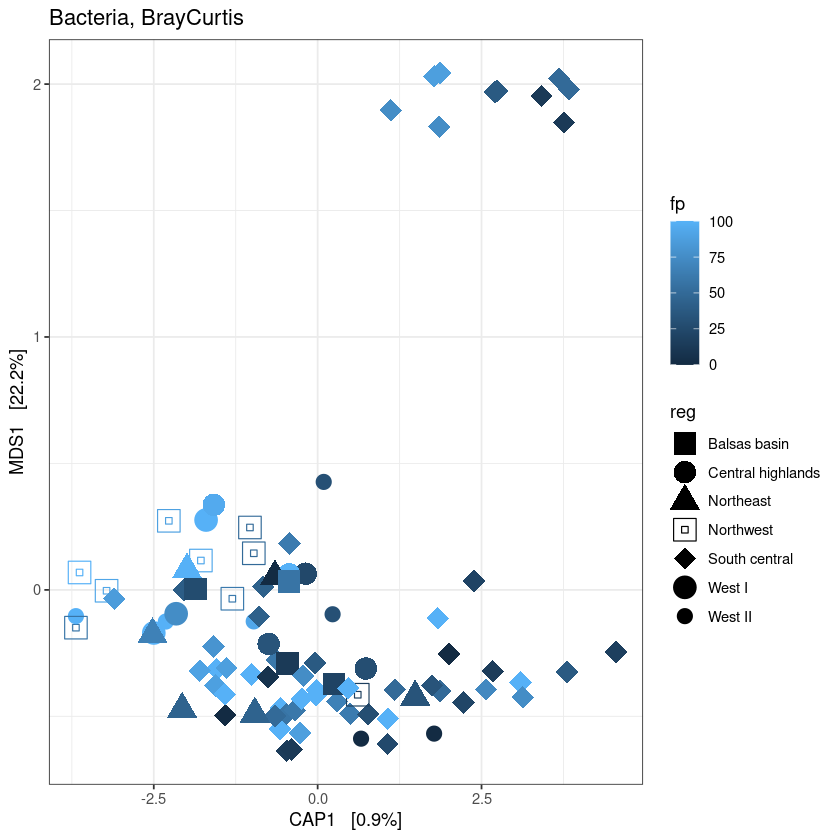

In [8]:
#Constrained ordination method (CAP) using Bray-Curtis for all samples
bact.bray=phyloseq::distance(bact, "bray")
bact.CAP.bray=ordinate(bact, "CAP", distance=bact.bray, ~fp)

cap_plot2_bact=plot_ordination(bact, bact.CAP.bray, type="samples",color="fp",
    title="Bacteria, BrayCurtis",shape="reg")+
    theme_bw() + geom_point(size = 6) + scale_shape_manual(values = c(15,16,17,0,18,19,20))
cap_plot2_bact

In [9]:
library(dendextend)

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:permute’:

    shuffle


The following object is masked from ‘package:stats’:

    cutree




In [15]:
#Calculation of unweighted Unifrac distances at OTUs level
bact.UF=UniFrac(bact, weighted=FALSE, normalized=FALSE, fast=TRUE)
#Creating dendrogram
bact.clust.UF=hclust(bact.UF)
bact.dend=as.dendrogram(bact.clust.UF, hang = -1, check = TRUE)

pdf("dend_b_sample.pdf", width=15)
plot(bact.dend)
dev.off()

Warning message in UniFrac(bact, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 201605 -- in the phylogenetic tree in the data you provided.”


png 
  2

png 
  2

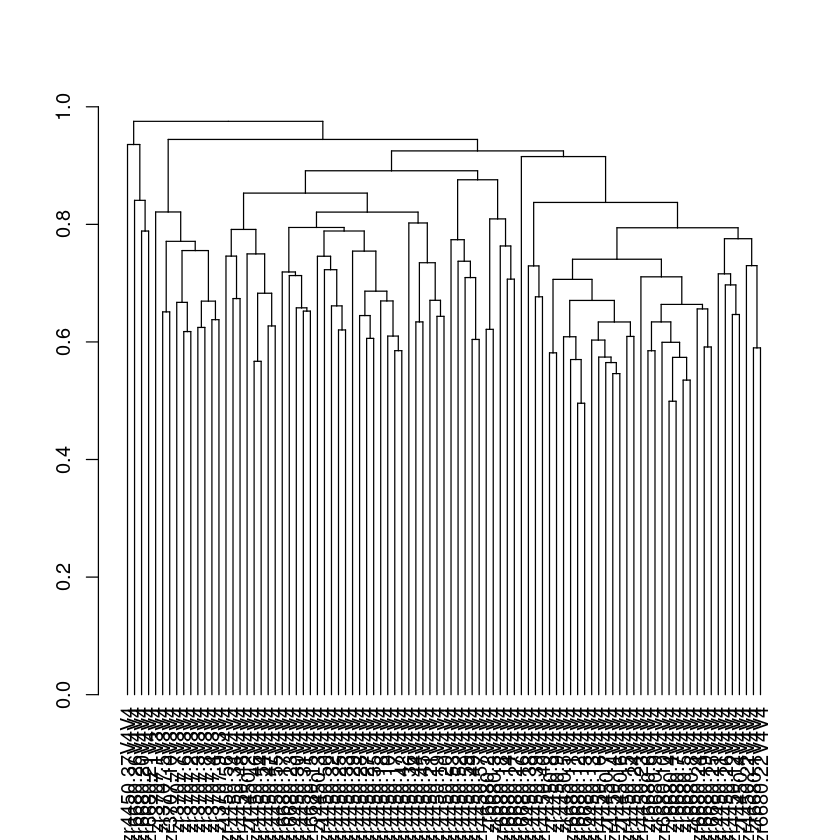

In [16]:
plot(bact.dend)

#Modifying labels
order_dend=labels(bact.dend)
bact.dend2=bact.dend
subset=sampledata[,c(8)]
subset_ordered=subset[order_dend,]
labels(bact.dend2) <- subset_ordered$distid
pdf("dend_b_dist.pdf", width=15)
plot(bact.dend2)
dev.off()

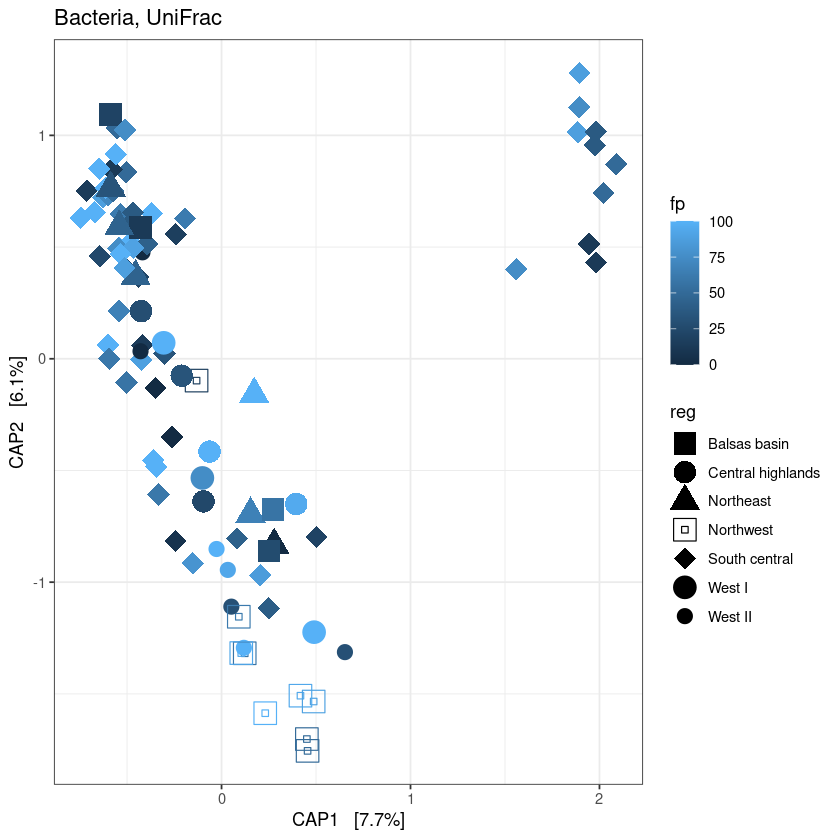

In [17]:
#Constrained ordination method (CAP) using unweighted UniFrac for all samples
bact.CAP.uf=ordinate(bact, "CAP", distance=bact.UF, ~distid+GK+tankm+fp+reg)

cap_plot_bact=plot_ordination(bact, bact.CAP.uf, type="samples",color="fp",
    title="Bacteria, UniFrac",shape="reg")+
    theme_bw() + geom_point(size = 6) + scale_shape_manual(values = c(15,16,17,0,18,19,20))

cap_plot_bact

In [21]:
#ANOSIM for unweighted UniFrac

m=sampledata$distid 
n=sampledata$GK
o=sampledata$tankt
p=sampledata$fp
q=sampledata$agavesp
r=sampledata$reg
s=sampledata$tankm

t=sampledata$Lp
u=sampledata$Li
v=sampledata$Lt
w=sampledata$La

a_m= anosim(bact.UF, m, permutations = 9999)
a_n= anosim(bact.UF, n, permutations = 9999)
a_o= anosim(bact.UF, o, permutations = 9999)
a_p= anosim(bact.UF, p, permutations = 9999)
a_q= anosim(bact.UF, q, permutations = 9999)
a_r= anosim(bact.UF, r, permutations = 9999)
a_s= anosim(bact.UF, s, permutations = 9999)
a_t= anosim(bact.UF, t, permutations = 9999)
a_u= anosim(bact.UF, u, permutations = 9999)
a_v= anosim(bact.UF, v, permutations = 9999)
a_w= anosim(bact.UF, w, permutations = 9999)

In [22]:
a_m #ANOSIM statistic R: 0.5967 Significance: 1e-04 distid ##
a_n #ANOSIM statistic R: 0.2768 Significance: 1e-04 GK ##
a_o #ANOSIM statistic R: -0.1216 Significance: 0.9533 tankt
a_p #ANOSIM statistic R: 0.2567 Significance: 0.006 fp ##
a_q #ANOSIM statistic R: -0.177 Significance: 0.9855 agavesp
a_r #ANOSIM statistic R: 0.1949 Significance: 0.0111 reg ##
a_s #ANOSIM statistic R: 0.1217 Significance: 0.0571 tankm
a_t #ANOSIM statistic R: 0.5648 Significance: 1e-04 ##
a_u #ANOSIM statistic R: 0.5585 Significance: 1e-04 ##
a_v #ANOSIM statistic R: 0.5585 Significance: 1e-04 ##
a_w #ANOSIM statistic R: 0.5585 Significance: 1e-04 ##


Call:
anosim(x = bact.UF, grouping = m, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.5967 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = n, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.2768 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = o, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: -0.1216 
      Significance: 0.9533 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = p, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.2567 
      Significance: 0.006 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = q, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: -0.177 
      Significance: 0.9855 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = r, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.1949 
      Significance: 0.0111 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = s, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.1217 
      Significance: 0.0571 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = t, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.5648 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = u, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.5585 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = v, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.5585 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = bact.UF, grouping = w, permutations = 9999) 
Dissimilarity: 

ANOSIM statistic R: 0.5585 
      Significance: 1e-04 

Permutation: free
Number of permutations: 9999


In [23]:
library(paletteer)

Warning message in y$name <- factor(sampledata$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

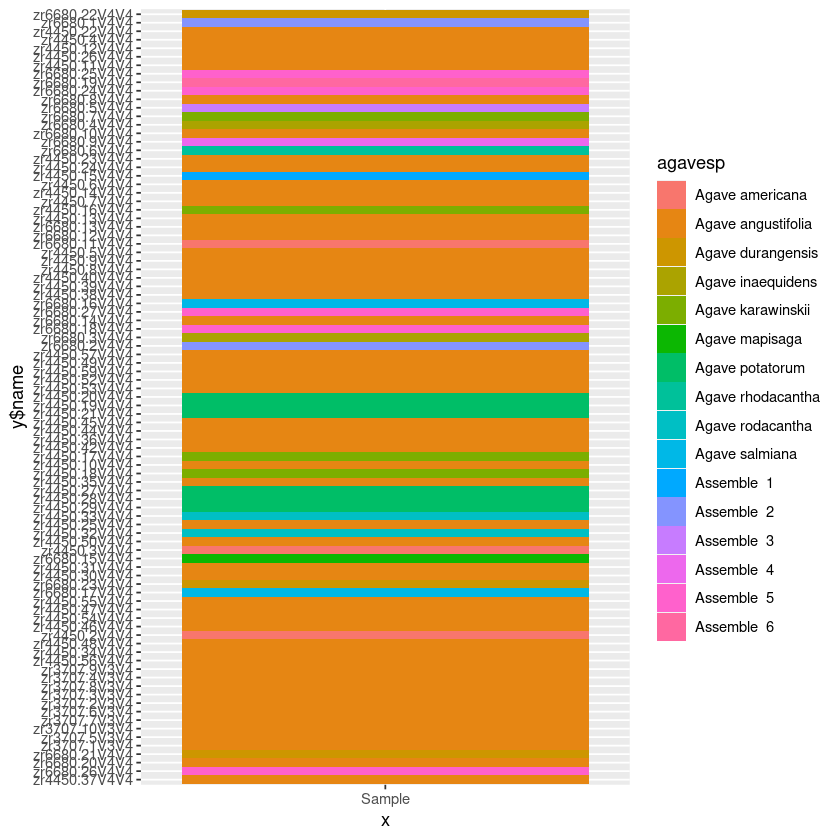

In [24]:
#Creating heatmaps for Figure 3
#Agave
x <- sampledata$agavesp
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= order_dend)
svg("agv_b.svg")
ggplot(sampledata, aes(x, y = y$name, fill=agavesp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("ggsci::springfield_simpsons")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=agavesp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("ggsci::springfield_simpsons")

Warning message in y$name <- factor(shan$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

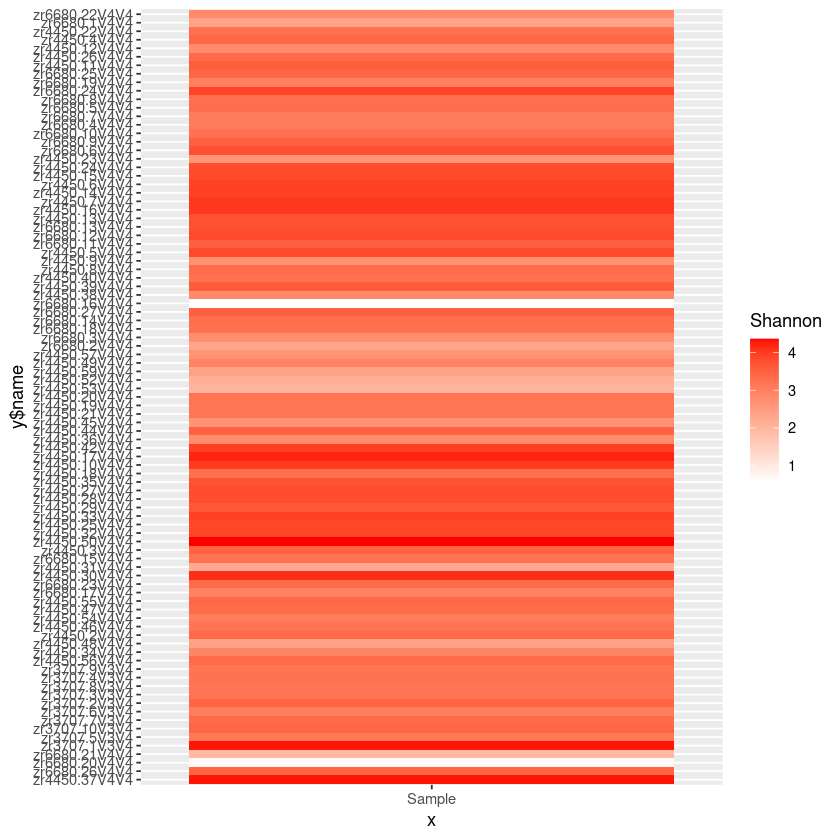

In [25]:
#Shannon
shan <- read.table("div_mezcal_16Sotus.tsv", header=TRUE, row.names=1)
x <- shan$Shannon
shan$id.1<-rownames(shan)
x <- "Sample"
y <- shan$id.1
y$name <- factor(shan$id.1, levels= order_dend)
svg("shannon_b.svg")
ggplot(shan, aes(x, y = y$name, fill=Shannon)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_fill_gradient(low="white", high="red")
dev.off()
ggplot(shan, aes(x, y = y$name, fill=Shannon)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_fill_gradient(low="white", high="red")

Warning message in y$name <- factor(sampledata$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

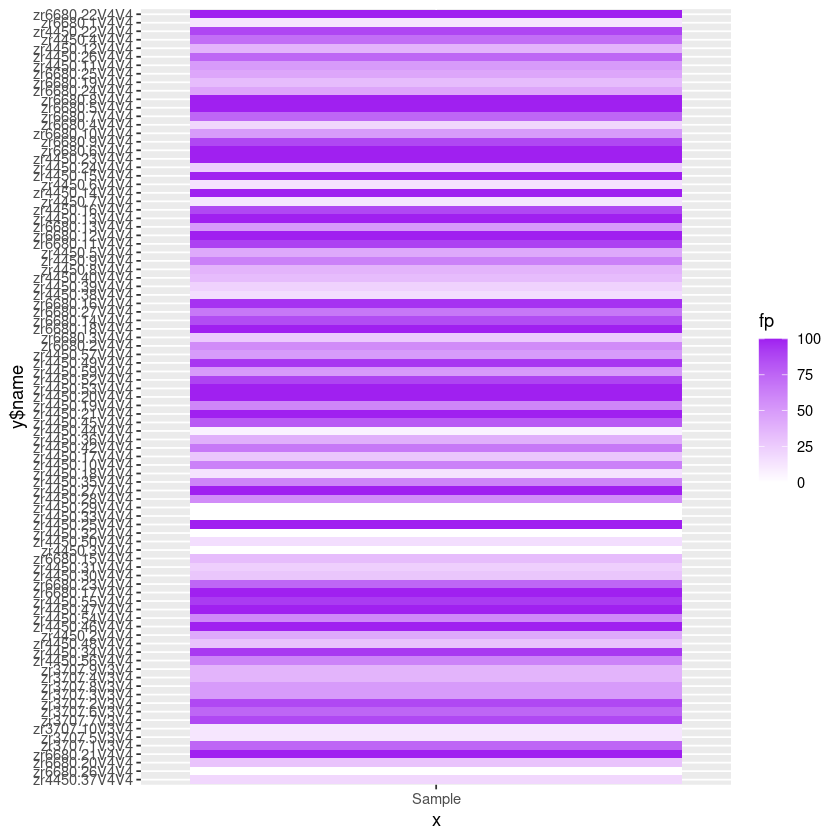

In [26]:
#Fermentation
x <- sampledata$fp
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= order_dend)
svg("fp_b.svg")
ggplot(sampledata, aes(x, y = y$name, fill=fp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+ scale_fill_gradient(low="white", high="purple")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=fp)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+ scale_fill_gradient(low="white", high="purple")

Warning message in y$name <- factor(sampledata$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

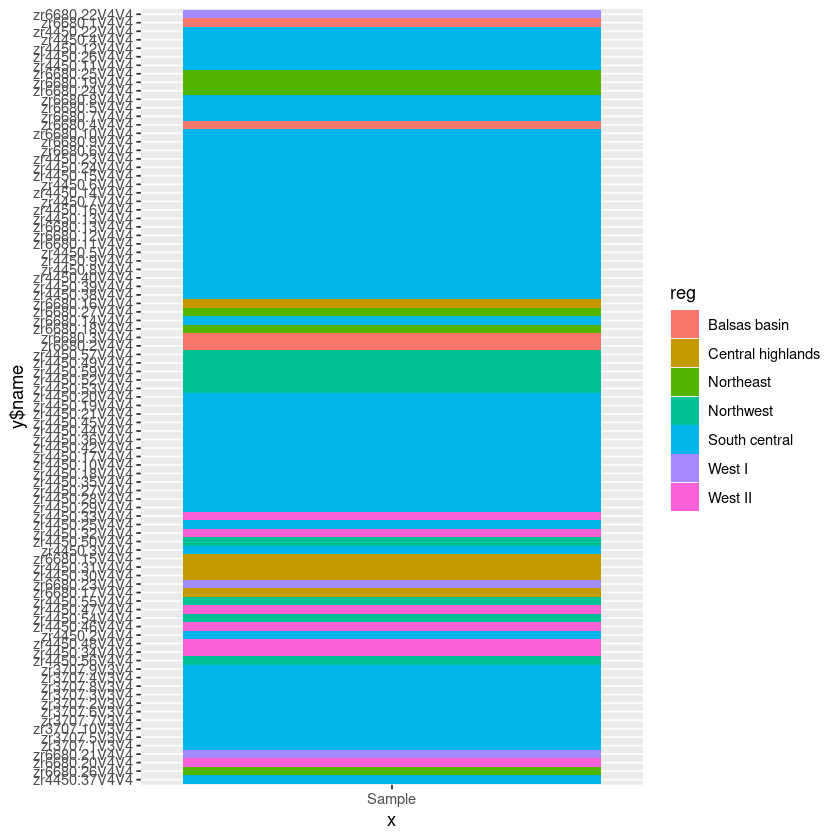

In [27]:
#Region
x <- sampledata$reg
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= order_dend)
svg("reg_b.svg")
ggplot(sampledata, aes(x, y = y$name, fill=reg)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=reg)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

Warning message in y$name <- factor(sampledata$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

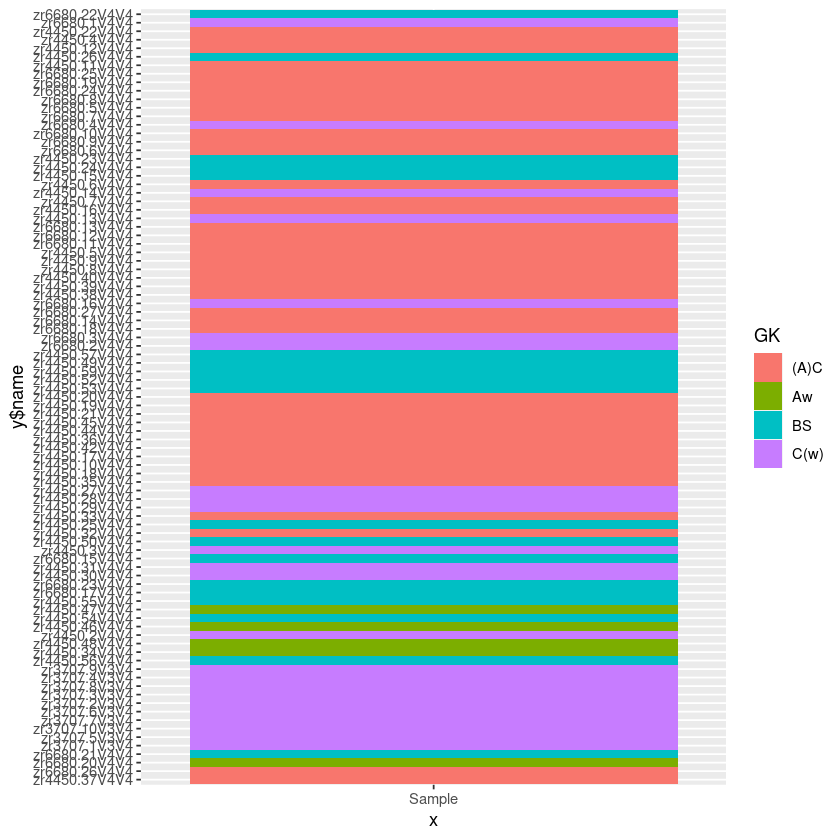

In [28]:
#Climate
x <- sampledata$GK
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= order_dend)
svg("GK_b.svg")
ggplot(sampledata, aes(x, y = y$name, fill=GK)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=GK)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

Warning message in y$name <- factor(sampledata$id.1, levels = order_dend):
“Coercing LHS to a list”


png 
  2

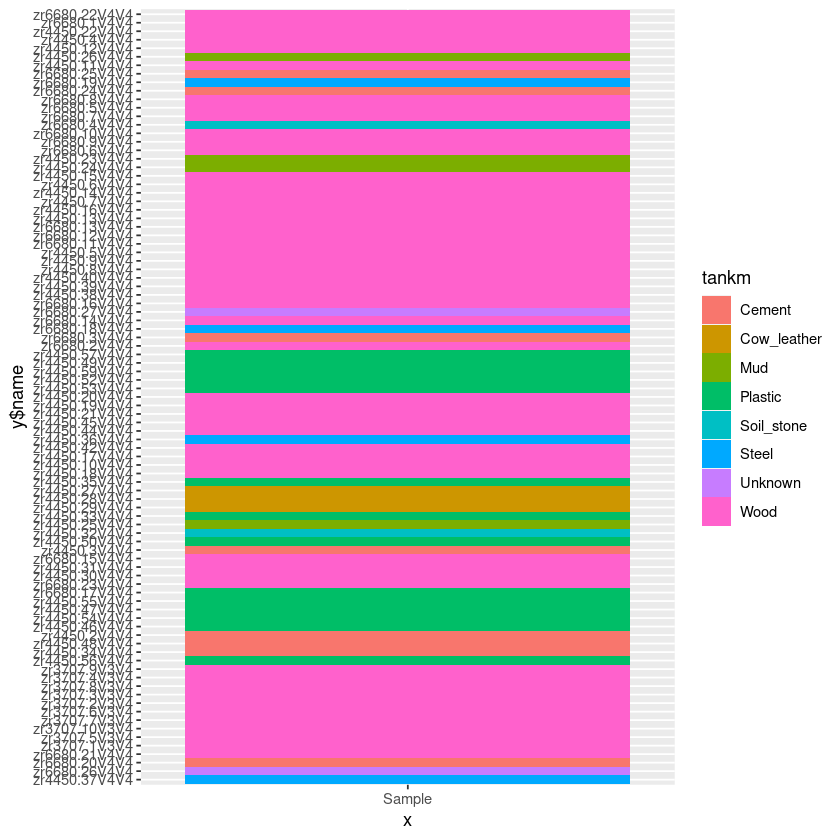

In [29]:
#Tank material
x <- sampledata$tankm
sampledata$id.1<-rownames(sampledata)
x <- "Sample"
y <- sampledata$id.1
y$name <- factor(sampledata$id.1, levels= order_dend)
svg("tankm_b.svg")
ggplot(sampledata, aes(x, y = y$name, fill=tankm)) + geom_tile() + scale_y_discrete(limits=rev(levels(y)))+scale_color_paletteer_d("colorBlindness::paletteMartin")
dev.off()
ggplot(sampledata, aes(x, y = y$name, fill=tankm)) + geom_tile() + scale_y_discrete(limits=rev(levels(y))) + scale_color_paletteer_d("colorBlindness::paletteMartin")

In [43]:
#EVALUATING RELATION WITH GEOGRAPHIC DISTANCE

In [44]:
#Importing geogrpahic distance matrix
coord=read.table("coordinates_samples.tsv")
coord_data_index <- match(common_samples, row.names(mezcal_data))
coord <- coord[mezcal_data_index,]
#write.table(coord, "coordinates_ordered.tsv") This table was manually edited to remove the first row and the first column with ids

geo_dist = (read.table("geo_dist_16S.txt", header=TRUE,row.names = 1))
write.csv(geo_dist,"geo_dist_16S.csv")

In [45]:
#Creating distance matrix using UniFrac distance#
bact.UF_m=as.matrix(bact.UF)
#write.table(bact.UF_m,"sam_dist_UF_16Sotus.txt") This table was manually edited to arrange the first row
sam_dist = as.matrix(read.table("sam_dist_UF_16Sotus.txt", row.names=1))
#sam_dist = sam_dist[-c(1:6),-c(1:6)] This was done to remove pulque samples. It is not necessary anymore
head(sam_dist)

#Loading geographic distance matrix
gd=as.data.frame(read.csv("geo_dist_16S.csv", header =T, row.names = 1))
head(gd)

,zr4450.10V4V4,zr4450.11V4V4,zr4450.12V4V4,zr4450.13V4V4,zr4450.14V4V4,zr4450.15V4V4,zr4450.16V4V4,zr4450.17V4V4,zr4450.18V4V4,zr4450.19V4V4,⋯,zr3707.6V3V4,zr3707.5V3V4,zr3707.1V3V4,zr3707.7V3V4,zr3707.10V3V4,zr3707.2V3V4,zr3707.3V3V4,zr3707.4V3V4,zr3707.8V3V4,zr3707.9V3V4
zr4450.10V4V4,0.0000000,0.6526016,0.7506221,0.6968096,0.6816550,0.6658908,0.6499673,0.6072195,0.6702600,0.7471916,⋯,0.8705766,0.8825077,0.8693992,0.8693420,0.8602670,0.8567840,0.8686430,0.8633014,0.8648367,0.8710463
zr4450.11V4V4,0.6526016,0.0000000,0.7136669,0.7362613,0.7274691,0.7379927,0.7323158,0.7180102,0.7630440,0.8230999,⋯,0.8724581,0.8993422,0.8947527,0.8749362,0.8918198,0.8636772,0.8930661,0.8846567,0.8964064,0.8731384
zr4450.12V4V4,0.7506221,0.7136669,0.0000000,0.7645991,0.7556933,0.7250972,0.7598836,0.7710172,0.7567026,0.7691763,⋯,0.8793029,0.9107714,0.9051180,0.8622581,0.8997595,0.8742395,0.8898337,0.8865056,0.9010671,0.8803303
zr4450.13V4V4,0.6968096,0.7362613,0.7645991,0.0000000,0.5913031,0.6340076,0.6052171,0.6594818,0.7395499,0.7677328,⋯,0.8482275,0.8657833,0.8439124,0.8516359,0.8340512,0.8242829,0.8410100,0.8398970,0.8434662,0.8474256
zr4450.14V4V4,0.6816550,0.7274691,0.7556933,0.5913031,0.0000000,0.5987022,0.5735264,0.6568489,0.7215717,0.7471321,⋯,0.8469604,0.8644938,0.8519956,0.8514821,0.8532787,0.8304222,0.8460524,0.8477969,0.8380965,0.8416070
zr4450.15V4V4,0.6658908,0.7379927,0.7250972,0.6340076,0.5987022,0.0000000,0.5829166,0.6504949,0.7046357,0.7366463,⋯,0.8638887,0.8741748,0.8553197,0.8536881,0.8582684,0.8434490,0.8576544,0.8593115,0.8609598,0.8570140


,zr4450.10V4V4,zr4450.11V4V4,zr4450.12V4V4,zr4450.13V4V4,zr4450.14V4V4,zr4450.15V4V4,zr4450.16V4V4,zr4450.17V4V4,zr4450.18V4V4,zr4450.19V4V4,⋯,zr3707.6V3V4,zr3707.5V3V4,zr3707.1V3V4,zr3707.7V3V4,zr3707.10V3V4,zr3707.2V3V4,zr3707.3V3V4,zr3707.4V3V4,zr3707.8V3V4,zr3707.9V3V4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
zr4450.10V4V4,0.00,0.00,0.00,0.00,0.00,63.36,57.58,57.58,57.58,26.62,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zr4450.11V4V4,0.00,0.00,0.00,0.00,0.00,63.36,57.58,57.58,57.58,26.62,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zr4450.12V4V4,0.00,0.00,0.00,0.00,0.00,63.36,57.58,57.58,57.58,26.62,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zr4450.13V4V4,0.00,0.00,0.00,0.00,0.00,63.36,57.58,57.58,57.58,26.62,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zr4450.14V4V4,0.00,0.00,0.00,0.00,0.00,63.36,57.58,57.58,57.58,26.62,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
zr4450.15V4V4,63.36,63.36,63.36,63.36,63.36,0.00,7.95,7.95,7.95,49.72,⋯,63.36,63.36,63.36,63.36,63.36,63.36,63.36,63.36,63.36,63.36



Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = sam_dist, ydis = gd, method = "pearson", permutations = 999) 

Mantel statistic r: 0.2321 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0845 0.1051 0.1310 0.1625 
Permutation: free
Number of permutations: 999


NULL

NULL

png 
  2

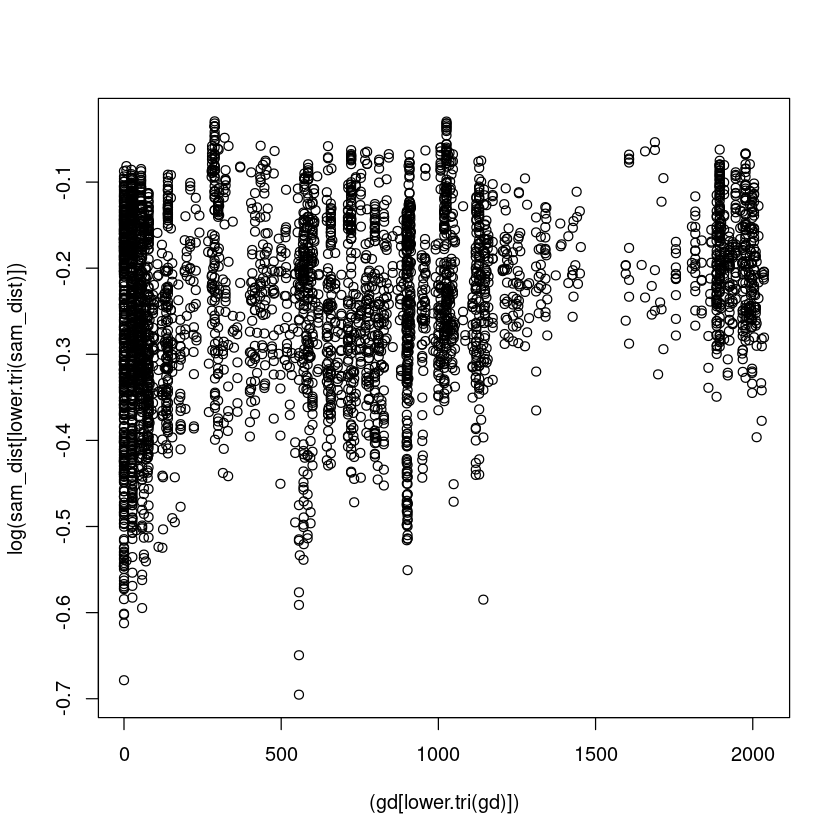

In [46]:
#Mantel test with unweighted UniFrac matrix
mantel(sam_dist, gd, method="pearson", permutations=999)
mantel_plot_uf=plot((gd[lower.tri(gd)]), log(sam_dist[lower.tri(sam_dist)]))
mantel_plot_uf
svg("mantel_plot_16S.svg")
mantel_plot_uf=plot((gd[lower.tri(gd)]), log(sam_dist[lower.tri(sam_dist)]))
mantel_plot_uf
dev.off()

In [ ]:
##DISTILLERY 13 AGAVE ANALYSYS##

In [40]:
#Creating subsets#
pot=subset_samples(bact,distid=="D013" & po=="Agave potatorum")
oth=subset_samples(bact,distid=="D013" &po == "Other")
pot_oth=merge_phyloseq(pot,oth)
pot_oth

ang=subset_samples(bact,distid=="D013" & pa=="Agave angustifolia")
oth=subset_samples(bact,distid=="D013" & pa == "Other")
ang_oth=merge_phyloseq(ang,oth)
ang_oth

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 11 samples ]
sample_data() Sample Data:       [ 11 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 11 samples ]
sample_data() Sample Data:       [ 11 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

In [30]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package:

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

log2 fold change (MLE): po Other vs Agave.potatorum 
Wald test p-value: po Other vs Agave.potatorum 
DataFrame with 119 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat      pvalue        padj
      <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
2321    3.27556        4.98120  1.431355   3.48006 5.01310e-04 0.018399311
5818    5.54854        5.77048  1.658554   3.47922 5.02875e-04 0.018399311
2416   28.29412        2.99151  0.878958   3.40348 6.65341e-04 0.021863781
861    79.02906        6.87122  1.264517   5.43387 5.51449e-08 0.000012250
1612   34.36931        7.46839  1.525464   4.89582 9.78982e-07 0.000132375
...         ...            ...       ...       ...         ...         ...
11196   6.76947        6.05164   1.61520   3.74669 1.79183e-04 0.008317296
5850    8.04355        5.34337   1.48725   3.59277 3.27177e-04 0.012880014
6156   11.31136        4.99681   1.39579   3.57991 3.43709e-04 0.013361668
6187    8.01011        5.35777   1.6

Saving 15 x 6.67 in image


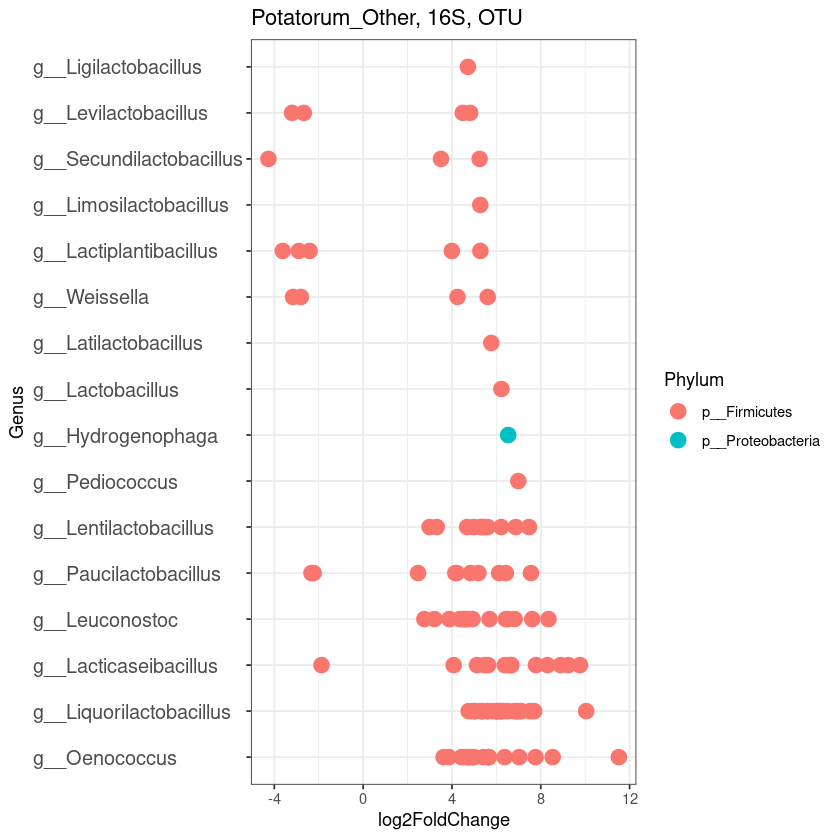

In [44]:
#Converting to DESeq and calling
alpha=0.05
pot_oth_deseq=phyloseq_to_deseq2(pot_oth,~po)
pot_oth_deseq=DESeq(pot_oth_deseq,test="Wald",fitType="local")
res_pot_oth=results(pot_oth_deseq, cooksCutoff=FALSE)
sigtab_pot_oth = res_pot_oth[which(res_pot_oth$padj < alpha), ]
sigtab_pot_oth
sigtab_pot_oth = cbind(as(sigtab_pot_oth, "data.frame"), as(tax_table(pot_oth)[rownames(sigtab_pot_oth), ], "matrix"))
write.table(sigtab_pot_oth,file="sigtab_pot_oth",sep="\t",row.names=TRUE)
#Exporting tables to csv format 
write.table(sigtab_pot_oth,file="sigtab_pot_oth.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Initial and Medium fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_pot_oth$log2FoldChange, sigtab_pot_oth$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_pot_oth$Phylum = factor(as.character(sigtab_pot_oth$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_pot_oth$log2FoldChange, sigtab_pot_oth$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_pot_oth$Genus = factor(as.character(sigtab_pot_oth$Genus), levels=names(y))
ggplot(sigtab_pot_oth, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Potatorum_Other, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

ggsave("deseq_pot_oth_D13_16Sotu.pdf", width=15)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

log2 fold change (MLE): pa Other vs Agave.angustifolia 
Wald test p-value: pa Other vs Agave.angustifolia 
DataFrame with 1 row and 6 columns
      baseMean log2FoldChange     lfcSE      stat      pvalue        padj
     <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
3109   25.2301       -24.5852   3.31994  -7.40533 1.30827e-13 4.07004e-10

Saving 15 x 6.67 in image


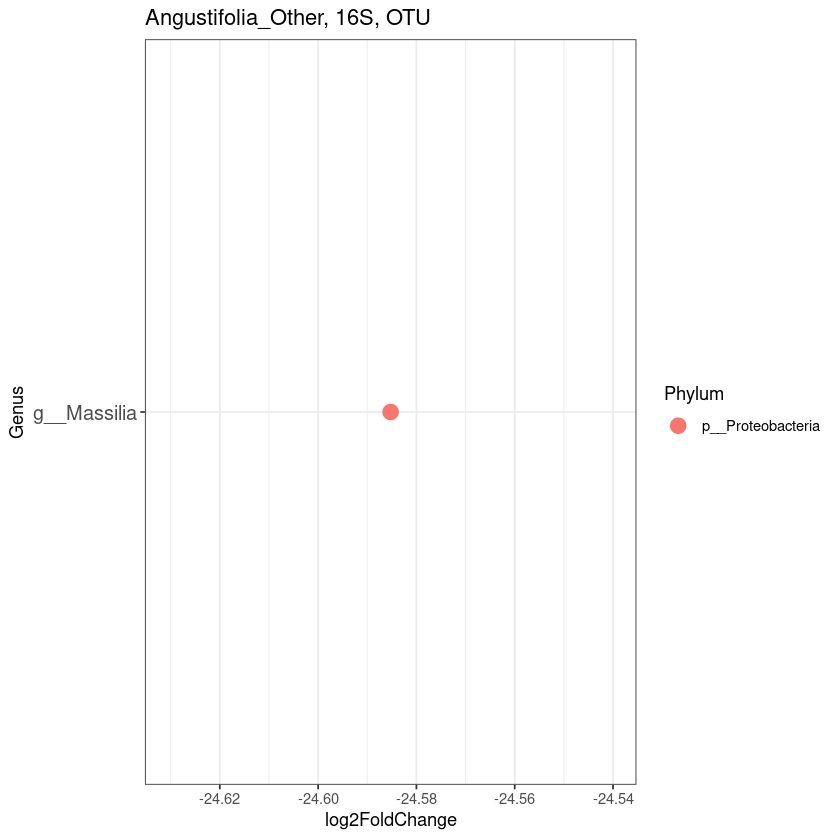

In [45]:
#Converting to DESeq and calling
alpha=0.05
ang_oth_deseq=phyloseq_to_deseq2(ang_oth,~pa)
ang_oth_deseq=DESeq(ang_oth_deseq,test="Wald",fitType="local")
res_ang_oth=results(ang_oth_deseq, cooksCutoff=FALSE)
sigtab_ang_oth = res_ang_oth[which(res_ang_oth$padj < alpha), ]
sigtab_ang_oth
sigtab_ang_oth = cbind(as(sigtab_ang_oth, "data.frame"), as(tax_table(ang_oth)[rownames(sigtab_ang_oth), ], "matrix"))
write.table(sigtab_ang_oth,file="sigtab_ang_oth",sep="\t",row.names=TRUE)
#Exporting tables to csv format 
write.table(sigtab_ang_oth,file="sigtab_ang_oth.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Initial and Medium fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_ang_oth$log2FoldChange, sigtab_ang_oth$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_ang_oth$Phylum = factor(as.character(sigtab_ang_oth$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_ang_oth$log2FoldChange, sigtab_ang_oth$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_ang_oth$Genus = factor(as.character(sigtab_ang_oth$Genus), levels=names(y))
ggplot(sigtab_ang_oth, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Angustifolia_Other, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

ggsave("deseq_ang_oth_D13_16Sotu.pdf", width=15)

In [47]:
##TIME SUCCESSION##

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 13 samples ]
sample_data() Sample Data:       [ 13 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

[1] "zr6680.12V4V4" "zr6680.13V4V4" "zr6680.14V4V4" "zr3707.6V3V4" 
 [5] "zr3707.5V3V4"  "zr3707.1V3V4"  "zr3707.7V3V4"  "zr3707.10V3V4"
 [9] "zr3707.2V3V4"  "zr3707.3V3V4"  "zr3707.4V3V4"  "zr3707.8V3V4" 
[13] "zr3707.9V3V4"

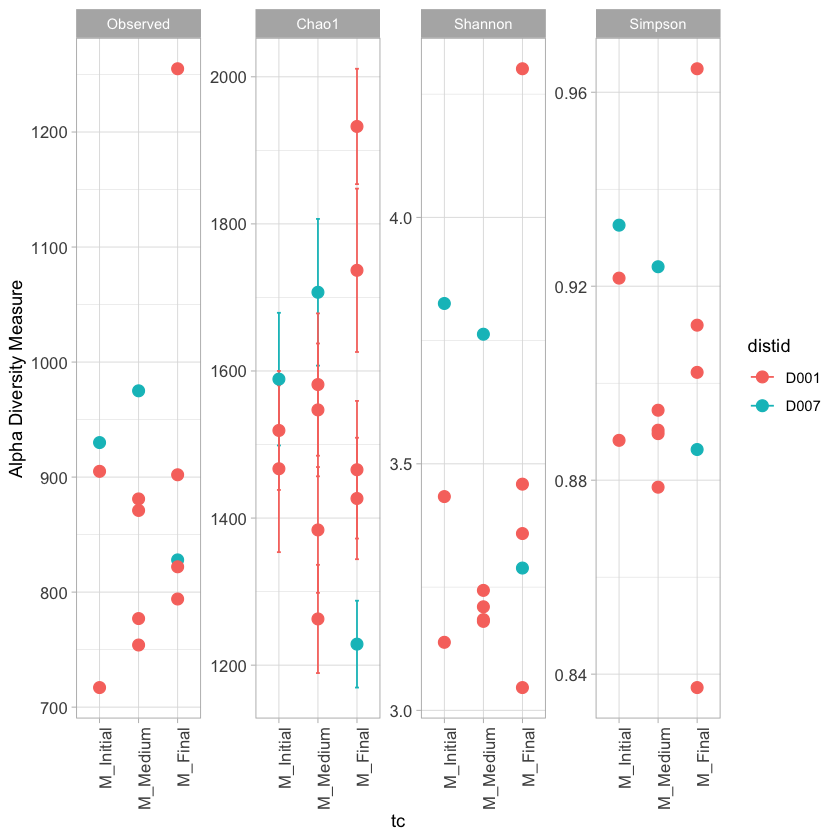

In [12]:
#Diversity indices for time succession
time_gen=subset_samples(bact,distid=="D007" & seqr=="Third" | distid=="D001")
time_gen
sample_names(time_gen)
write.table(estimate_richness(time_gen), file="div_time_ITSotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
violin_richness=plot_richness(time_gen, x="tc", measures=c("Observed", "Shannon", "Simpson","Chao1"), color="distid")+theme_light()+geom_point(size=3)+theme(axis.text.y = element_text(size = 10),axis.text.x = element_text(size = 10, angle = 90, hjust = 1))
neworder=c("M_Initial","M_Medium","M_Final")

violin_richness$data$tc <- as.character(violin_richness$data$tc)
violin_richness$data$tc <- factor(violin_richness$data$tc, levels=neworder)
print(violin_richness)

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning me

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 70 taxa and 3 samples ]
sample_data() Sample Data:       [ 3 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 70 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 70 tips and 69 internal nodes ]

,1034,5633,5808,72,5613,6180,5692,12297,5640,189101,⋯,24069,24450,23774,24581,7520,21759,5766,12626,5647,6940
M_Final,1.589328e-04,0.03167377,0.0094744451,0.05275543,0.03560607,0.002327596,0.006880252,1.538059e-05,0.10023532,0.0186412784,⋯,4.614178e-05,3.076119e-05,3.588805e-05,1.025373e-05,0.000000e+00,1.538059e-05,3.588805e-05,0.000000e+00,1.025373e-05,0.0000000000
M_Initial,7.769042e-05,0.01311414,0.0019811057,0.05991485,0.04701824,0.000551602,0.129867305,7.769042e-06,0.06365953,0.0001476118,⋯,1.553808e-05,2.330713e-05,2.330713e-05,1.553808e-05,7.769042e-06,7.769042e-06,1.553808e-05,1.553808e-05,6.525995e-04,0.0002563784
M_Medium,2.549995e-04,0.02857465,0.0001667304,0.04033405,0.05639902,0.002765763,0.071301772,4.903836e-05,0.30839242,0.0011965359,⋯,8.336521e-05,1.471151e-05,5.884603e-05,4.903836e-06,4.903836e-05,1.961534e-05,9.807672e-06,1.471151e-05,3.775954e-04,0.0002599033


Warning message:
“Transformation introduced infinite values in discrete y-axis”
Saving 6.67 x 9.5 in image
Warning message:
“Transformation introduced infinite values in discrete y-axis”


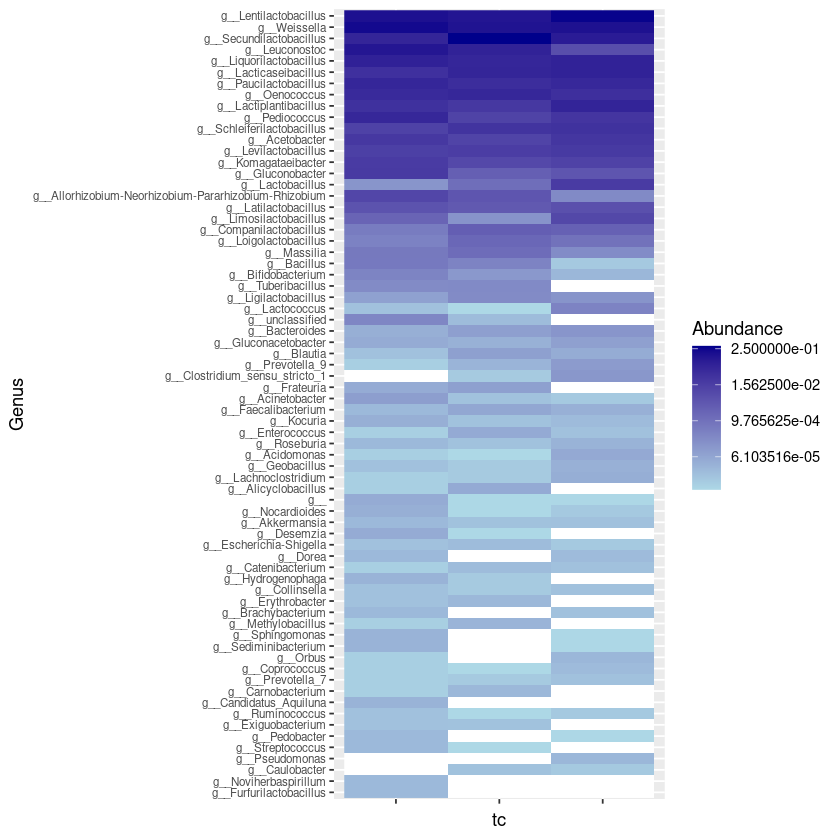

In [36]:
#Obtaining relative abundance to compare the time succession at genus level
time_gen_g=tax_glom(time_gen,"Genus")
time_gen_g_m<-merge_samples(time_gen_g,"tc")
time_gen_rel_g=transform_sample_counts(time_gen_g_m, function(x) x / sum(x))
time_gen_rel_g
#Creating heatmap
top70s_g <- prune_taxa(names(sort(taxa_sums(time_gen_rel_g),TRUE)[1:70]),time_gen_rel_g)
top70s_g
otu_table(top70s_g)
g_time70s_plot <- plot_heatmap(top70s_g, taxa.label = "Genus", method = NULL, high = "dark blue", 
                              low ="light blue", na.value = "white", 
                              taxa.order  = names(sort(taxa_sums(top70s_g))), sample.label="tc",sample.order=c("M_Initial", "M_Medium", "M_Final"))+xlab(label = "tc")
g_time70s_plot= g_time70s_plot+ theme (axis.text.x = element_text(size=8), axis.text.y = element_text(size=7))
g_time70s_plot

Warning message in UniFrac(time_gen, weighted = FALSE, normalized = FALSE, fast = TRUE):
“Randomly assigning root as -- 1816 -- in the phylogenetic tree in the data you provided.”
Warning message in geom_segment(mapping = arrow_map, data = arrowdf, color = "black", :
“Ignoring unknown aesthetics: label”


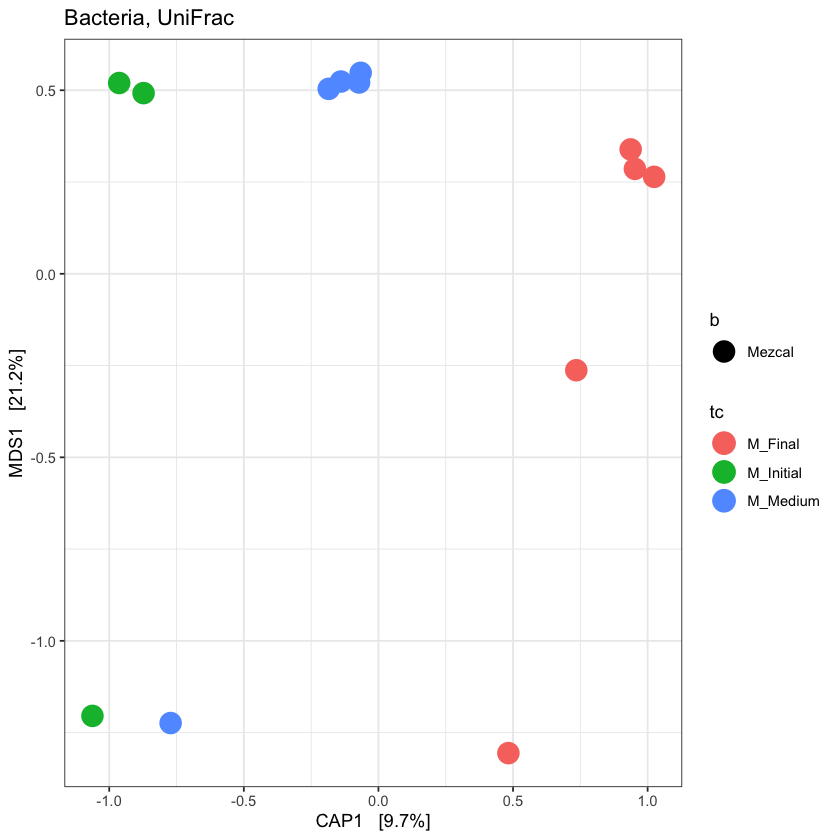

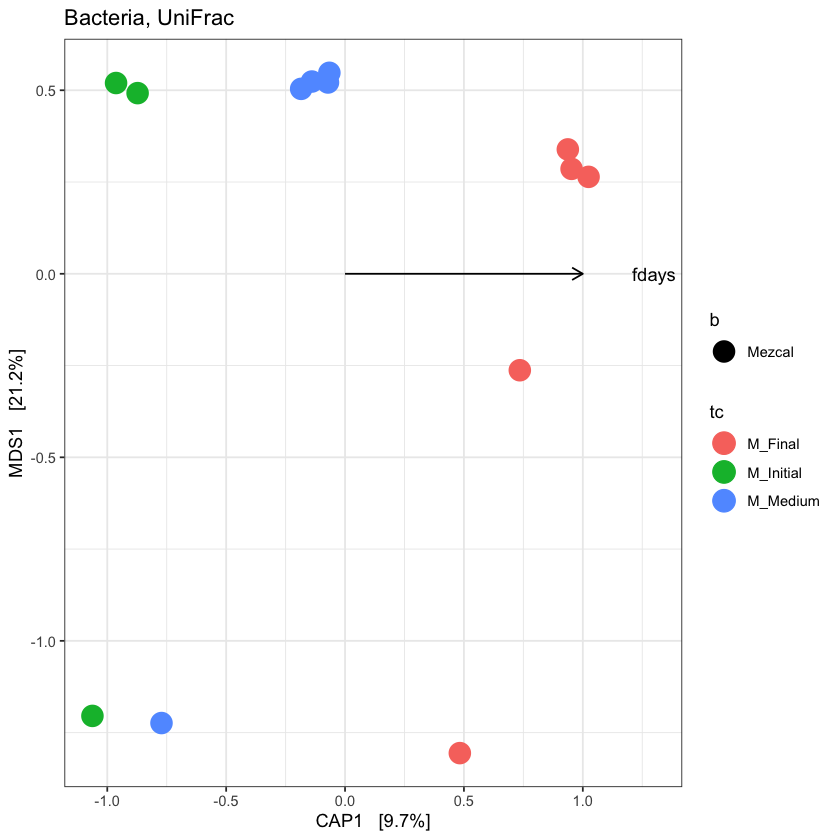

In [26]:
#Constrained ordination method (CAP) using unweighted UniFrac for different times
time.UF=UniFrac(time_gen, weighted=FALSE, normalized=FALSE, fast=TRUE)
time.CAP.uf=ordinate(time_gen, "CAP", distance=time.UF, ~fdays)

cap_plot=plot_ordination(time_gen, time.CAP.uf, type="samples",color="tc",
    title="Bacteria, UniFrac",shape="b")+
    theme_bw() + geom_point(size = 6)
cap_plot

In [15]:
#Paired comparisons
#Obtain subset to compare by pairs the time succession at OTU level
i=subset_samples(time_gen, tc=="M_Initial")
m=subset_samples(time_gen, tc=="M_Medium")
i_m=merge_phyloseq(i, m)
i_m

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

In [55]:
#Converting to DESeq and calling
alpha=0.05
i_m_deseq=phyloseq_to_deseq2(i_m,~tc)
i_m_deseq=DESeq(i_m_deseq,test="Wald",fitType="local")
res_i_m=results(i_m_deseq, cooksCutoff=FALSE)
sigtab_i_m = res_i_m[which(res_i_m$padj < alpha), ]
sigtab_i_m
sigtab_i_m = cbind(as(sigtab_i_m, "data.frame"), as(tax_table(i_m)[rownames(sigtab_i_m), ], "matrix"))
write.table(sigtab_i_m,file="sigtab_i_m",sep="\t",row.names=TRUE)
#Exporting tables to csv format 
write.table(sigtab_i_m,file="sigtab_i_m.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Initial and Medium fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_i_m$log2FoldChange, sigtab_i_m$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_m$Phylum = factor(as.character(sigtab_i_m$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_i_m$log2FoldChange, sigtab_i_m$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_m$Genus = factor(as.character(sigtab_i_m$Genus), levels=names(y))
ggplot(sigtab_i_m, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Initial_Medium, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

#ggsave("deseq_i_m_16Sotu.png", width=15)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Medium vs M Initial 
Wald test p-value: tc M Medium vs M Initial 
DataFrame with 0 rows and 6 columns

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [1] not equal to array extent


In [17]:
#Obtain subset to compare by pairs the time succession at OTU level
i=subset_samples(time_gen, tc=="M_Initial")
f=subset_samples(time_gen, tc=="M_Final")
i_f=merge_phyloseq(i, f)
i_f

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 8 samples ]
sample_data() Sample Data:       [ 8 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Initial vs M Final 
Wald test p-value: tc M Initial vs M Final 
DataFrame with 41 rows and 6 columns
      baseMean log2FoldChange     lfcSE      stat      pvalue        padj
     <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
861    59.1985        24.7539   3.45659   7.16138 7.98671e-13 1.18626e-11
5808   20.6813       -20.1986   3.53924  -5.70706 1.14942e-08 1.45114e-07
1348  155.9653        26.1023   3.45523   7.55443 4.20704e-14 1.24974e-12
346  3288.9321        30.0000   3.45443   8.68449 3.80450e-18 9.60880e-16
425   196.9489        26.4308   3.45505   7.64989 2.01159e-14 7.81425e-13
...        ...            ...       ...       ...         ...         ...
215   424.6354        27.5101   3.45470   7.96310 1.67777e-15 8.63811e-14
417    87.6593        25.2960   3.45588   7.31970 2.48532e-13 5.02035e-12
438   216.3022        26.3089   3.45500   7.61475 2.64212e-14 8.89515e-13
46    522.5406        27.8020   3.45464   8.04773 8.4346

Saving 15 x 7 in image


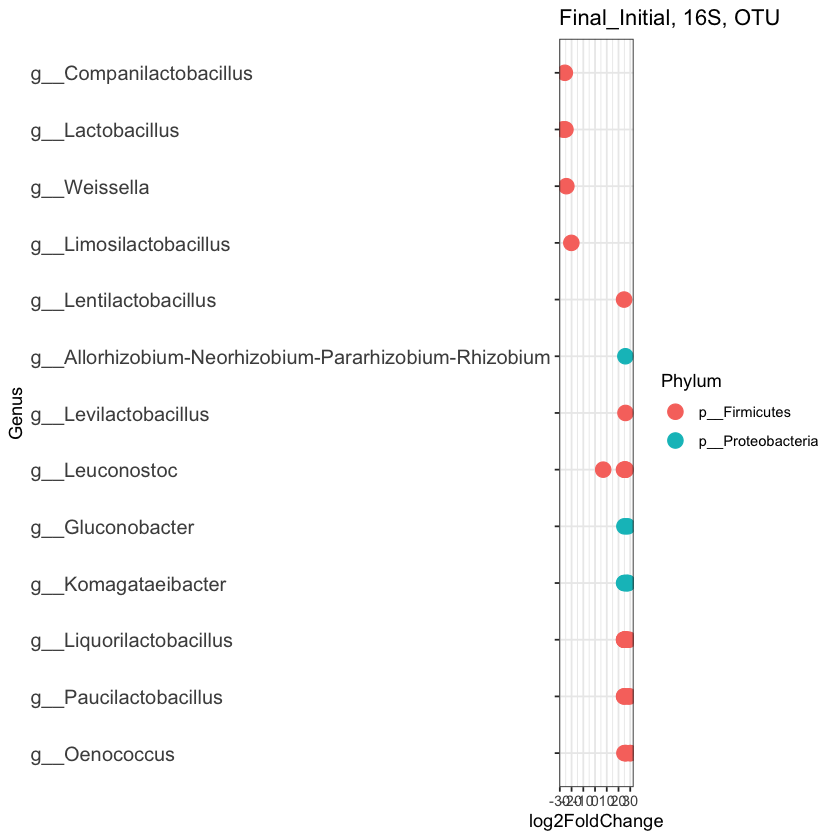

In [18]:
#Converting to DESeq and calling
alpha=0.05
i_f_deseq=phyloseq_to_deseq2(i_f,~tc)
i_f_deseq=DESeq(i_f_deseq,test="Wald",fitType="local")
res_i_f=results(i_f_deseq, cooksCutoff=FALSE)
sigtab_i_f = res_i_f[which(res_i_f$padj < alpha), ]
sigtab_i_f
sigtab_i_f = cbind(as(sigtab_i_f, "data.frame"), as(tax_table(i_f)[rownames(sigtab_i_f), ], "matrix"))
write.table(sigtab_i_f,file="sigtab_i_f",sep="\t",row.names=TRUE)
#Exporting tables to csv format 
write.table(sigtab_i_f,file="sigtab_i_f.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Initial and Final fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)}

# Phylum order
y = tapply(sigtab_i_f$log2FoldChange, sigtab_i_f$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_f$Phylum = factor(as.character(sigtab_i_f$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_i_f$log2FoldChange, sigtab_i_f$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_i_f$Genus = factor(as.character(sigtab_i_f$Genus), levels=names(y))
ggplot(sigtab_i_f, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Final_Initial, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

ggsave("deseq_i_f_16Sotu.svg", width=15)

In [19]:
#Obtain subset to compare by pairs the time succession at OTU level
m=subset_samples(time_gen, tc=="M_Medium")
f=subset_samples(time_gen, tc=="M_Final")
m_f=merge_phyloseq(m, f)
m_f

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10093 taxa and 10 samples ]
sample_data() Sample Data:       [ 10 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 10093 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10093 tips and 10083 internal nodes ]

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): tc M Medium vs M Final 
Wald test p-value: tc M Medium vs M Final 
DataFrame with 47 rows and 6 columns
      baseMean log2FoldChange     lfcSE      stat      pvalue        padj
     <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
2416   95.2528        10.6235   3.02764   3.50884 4.50062e-04 4.24595e-02
861   102.0566        10.7237   3.02754   3.54205 3.97030e-04 4.04135e-02
5808   20.4970       -22.3477   3.02828  -7.37964 1.58714e-13 2.11691e-11
1348  239.8330        26.1606   3.02676   8.64309 5.47129e-18 1.23104e-15
346  6128.4979        30.0000   3.02621   9.91339 3.64069e-23 1.03192e-19
...        ...            ...       ...       ...         ...         ...
375    255.141        25.1052   3.02673   8.29449 1.09052e-16 1.83397e-14
266    511.984        25.8981   3.02646   8.55723 1.15613e-17 2.35364e-15
200    629.349        27.6001   3.02641   9.11976 7.52879e-20 5.33552e-17
215    222.824        26.1451   3.02681   8.63784 5.72875e

Saving 15 x 7 in image


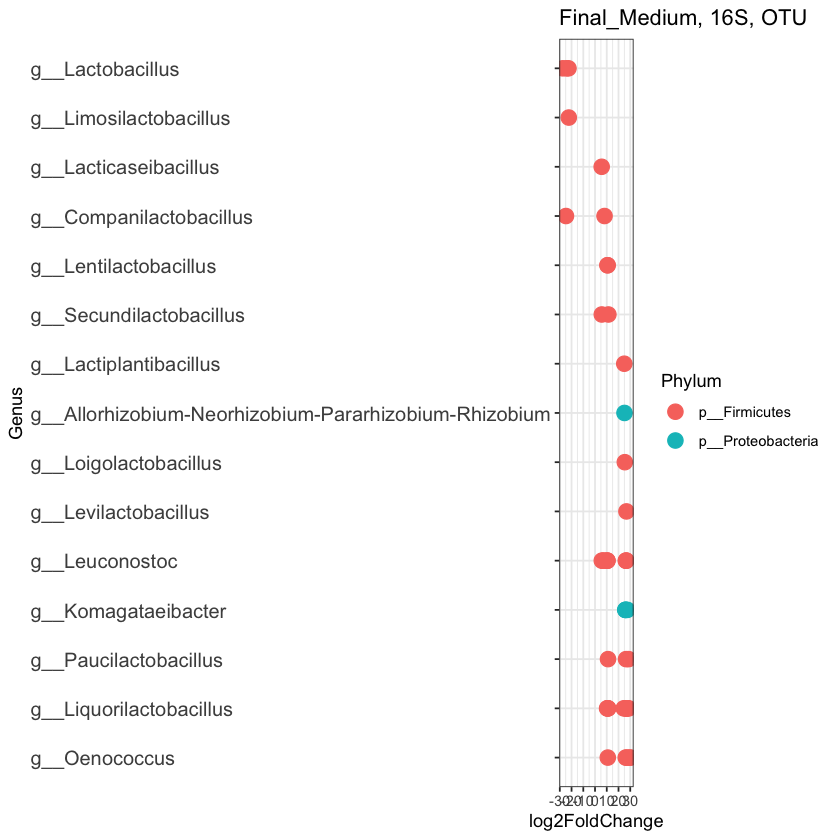

In [20]:
#Converting to DESeq and calling
alpha=0.05
m_f_deseq=phyloseq_to_deseq2(m_f,~tc)
m_f_deseq=DESeq(m_f_deseq,test="Wald",fitType="local")
res_m_f=results(m_f_deseq, cooksCutoff=FALSE)
sigtab_m_f = res_m_f[which(res_m_f$padj < alpha), ]
sigtab_m_f
sigtab_m_f = cbind(as(sigtab_m_f, "data.frame"), as(tax_table(m_f)[rownames(sigtab_m_f), ], "matrix"))
write.table(sigtab_m_f,file="sigtab_m_f",sep="\t",row.names=TRUE)
#Exporting tables to csv format 
write.table(sigtab_m_f,file="sigtab_m_f.tsv",sep="\t",row.names=TRUE)


#Plotting DESeq results for Medium and Final fermentation
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_m_f$log2FoldChange, sigtab_m_f$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_m_f$Phylum = factor(as.character(sigtab_m_f$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_m_f$log2FoldChange, sigtab_m_f$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_m_f$Genus = factor(as.character(sigtab_m_f$Genus), levels=names(y))
ggplot(sigtab_m_f, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=4) + ggtitle("Final_Medium, 16S, OTU") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5, size=12))

ggsave("deseq_m_f_16Sotu.svg", width=15)

In [ ]:
##Using pulque samples##

In [22]:
taxa_mp= as.matrix(read.table("nochimera_screened_singleton_cpmt.tax", row.names=1, fill=TRUE, header=T))
TAXA_mp = tax_table(taxa_mp)

otu_mp= read.table("nochimera_screened_singleton_cpmt.biom.tsv", row.names=1, fill=TRUE, header=T)
colnames(otu_mp)=c("zr4450.10V4V4","zr4450.11V4V4","zr4450.12V4V4","zr4450.13V4V4","zr4450.14V4V4","zr4450.15V4V4","zr4450.16V4V4",
"zr4450.17V4V4","zr4450.18V4V4","zr4450.19V4V4","zr4450.1V4V4","zr4450.20V4V4","zr4450.21V4V4","zr4450.22V4V4",
"zr4450.23V4V4","zr4450.24V4V4","zr4450.25V4V4","zr4450.26V4V4","zr4450.27V4V4","zr4450.28V4V4","zr4450.29V4V4",
"zr4450.2V4V4","zr4450.30V4V4","zr4450.31V4V4","zr4450.32V4V4","zr4450.33V4V4","zr4450.34V4V4","zr4450.35V4V4",
"zr4450.36V4V4","zr4450.37V4V4","zr4450.38V4V4","zr4450.39V4V4","zr4450.3V4V4","zr4450.40V4V4","zr4450.41V4V4",
"zr4450.42V4V4","zr4450.44V4V4","zr4450.45V4V4","zr4450.46V4V4","zr4450.47V4V4","zr4450.48V4V4","zr4450.49V4V4",
"zr4450.4V4V4","zr4450.50V4V4","zr4450.52V4V4","zr4450.53V4V4","zr4450.54V4V4","zr4450.55V4V4","zr4450.56V4V4",
"zr4450.57V4V4","zr4450.59V4V4","zr4450.5V4V4","zr4450.60V4V4","zr4450.6V4V4","zr4450.7V4V4","zr4450.8V4V4",
"zr4450.9V4V4","zr6680.10V4V4","zr6680.11V4V4","zr6680.12V4V4","zr6680.13V4V4","zr6680.14V4V4","zr6680.15V4V4",
"zr6680.17V4V4","zr6680.18V4V4","zr6680.19V4V4","zr6680.1V4V4","zr6680.20V4V4","zr6680.21V4V4","zr6680.22V4V4",
"zr6680.23V4V4","zr6680.24V4V4","zr6680.25V4V4","zr6680.26V4V4","zr6680.27V4V4","zr6680.2V4V4","zr6680.3V4V4",
"zr6680.4V4V4","zr6680.5V4V4","zr6680.6V4V4","zr6680.7V4V4","zr6680.8V4V4","zr6680.9V4V4","zr6680.16V4V4",
"zr4450.43V4V4","zr4450.51V4V4","zr4450.58V4V4","zr3707.6V3V4","amiel2.S69","punta2.S71","zr3707.5V3V4",
"zr3707.1V3V4","amiel1.S68","pulque1.S66","pulque2.S67","punta1.S70","zr3707.7V3V4","zr3707.10V3V4","zr3707.2V3V4",
"zr3707.3V3V4","zr3707.4V3V4","zr3707.8V3V4","zr3707.9V3V4")
OTU_mp = otu_table(otu_mp, taxa_are_rows=T)

bact_mp = phyloseq(OTU_mp,TAXA_mp)
bact_mp

sample_order_mp <- sample_names(bact_mp)

mezcal_data_mp=read.delim("metadata_text", header=TRUE, row.names=1, sep="\t")

##Arrangin dataframe samples order
mezcal_data_index_mp <- match(sample_order_mp, row.names(mezcal_data_mp))
mezcal_data <- mezcal_data_mp[mezcal_data_index_mp,]


sampledata_mp=sample_data(data.frame(SL=mezcal_data$SequencingLabel,criolab=mezcal_data$CriovialLabel,criolabw=mezcal_data$Criovial_label_withIsolates,state=mezcal_data$State, reg=mezcal_data$Region, mun=mezcal_data$Municipality, dist=mezcal_data$Distillery_name, distid=mezcal_data$Distillery_ID, agavesp=mezcal_data$Agave_speciesname,subsp=mezcal_data$Agave_suspeciesname, agavenm=mezcal_data$Agave_commoname, ensmb=mezcal_data$Assemble,fdays=mezcal_data$Fermentation_days,ftotal=mezcal_data$Fermentation_totaldays,fp=mezcal_data$Fermentation_percentage,fer=mezcal_data$Fermentation_range,tankm=mezcal_data$Tank_material, alt=mezcal_data$Altitude, lat=mezcal_data$Latitude_site, long=mezcal_data$Longitude_site, tankt=mezcal_data$Tank_temperatureC,cook=mezcal_data$Cooking_type, alemb=mezcal_data$Alembic_material,grind=mezcal_data$Grinding_type,inoc=mezcal_data$Inoculum,date=mezcal_data$Sample_date_YYYYMMDD, newlat=mezcal_data$NewLatitude_Municipality_Geocode,newlong=mezcal_data$NewLongitude_Municipality_Geocode,tinanm=mezcal_data$Num_de_Tina,loc=mezcal_data$Location_ID,GKd=mezcal_data$Climate_GK,GK=mezcal_data$ClimateGroup_GK,Lp=mezcal_data$Loc_PrecipMediaAnual,Li=mezcal_data$Loc_Isotermalidad,Lt=mezcal_data$Loc_TempMediaAnual,La=mezcal_data$Loc_Altitud_inegi,div=mezcal_data$Shannon_index, divs=mezcal_data$Simpson_index,tc=mezcal_data$time_comp, b=mezcal_data$beverage,seqr=mezcal_data$sequencing_round, ns=mezcal_data$num_samples,comp=mezcal_data$comp,row.names=sample_names(bact_mp)))

bact_mp <- merge_phyloseq(bact_mp, sampledata_mp)
bact_mp

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 16800 taxa and 103 samples ]
tax_table()   Taxonomy Table:    [ 16800 taxa by 6 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 16800 taxa and 103 samples ]
sample_data() Sample Data:       [ 103 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 16800 taxa by 6 taxonomic ranks ]

In [23]:
write.table(estimate_richness(bact_mp), file="div_mp_16Sotus.tsv",append = FALSE, quote = TRUE, sep = "\t")
g_mp=tax_glom(bact_mp,"Genus")
g_mp
g_c=otu_table(g_mp)
g_t=tax_table(g_mp)
write.table(g_c,"g_mp_counts.tsv")
write.table(g_t,"g_mp_tax.tsv")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 923 taxa and 103 samples ]
sample_data() Sample Data:       [ 103 samples by 43 sample variables ]
tax_table()   Taxonomy Table:    [ 923 taxa by 6 taxonomic ranks ]